# Predictive Analytics Project: Video Games Sales Analysis

## Project Overview
This project demonstrates comprehensive predictive analytics techniques using video games sales data. The project covers all six units of the Predictive Analytics syllabus:

- **Unit I**: Introduction and Data Preparation
- **Unit II**: Supervised Learning - Regression
- **Unit III**: Supervised Learning - Classification
- **Unit IV**: Unsupervised Learning - Clustering and Pattern Detection
- **Unit V**: Dimensionality Reduction and Neural Networks
- **Unit VI**: Model Performance Evaluation

---


# Unit I: Introduction and Data Preparation

## 1.1 Import Required Libraries


In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, KFold, LeaveOneOut
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.svm import SVC
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, log_loss, roc_curve
)
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("All libraries imported successfully!")


All libraries imported successfully!


## 1.2 Load and Explore Dataset


In [2]:
# Load the dataset
df = pd.read_csv('video_games_sales.csv')

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
df.head(10)


Dataset Shape: (16598, 11)

First few rows:


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [3]:
# Dataset information
print("Dataset Info:")
df.info()
print("\n" + "="*50)
print("\nDataset Statistics:")
df.describe()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Dataset Statistics:


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [4]:
# Check for missing values
print("Missing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
print(f"\nTotal missing values: {df.isnull().sum().sum()}")


Missing Values:
Year         271
Publisher     58
dtype: int64

Total missing values: 329


## 1.3 Data Cleaning and Preprocessing


In [5]:
# Create a copy for preprocessing
df_clean = df.copy()

# Handle missing values in Year column
print(f"Missing values in Year: {df_clean['Year'].isnull().sum()}")
# Fill missing years with median or drop
df_clean = df_clean.dropna(subset=['Year'])
df_clean['Year'] = df_clean['Year'].astype(int)

# Handle missing values in Publisher
print(f"Missing values in Publisher: {df_clean['Publisher'].isnull().sum()}")
df_clean['Publisher'] = df_clean['Publisher'].fillna('Unknown')

# Standardize text columns
df_clean['Genre'] = df_clean['Genre'].str.strip()
df_clean['Platform'] = df_clean['Platform'].str.strip()
df_clean['Publisher'] = df_clean['Publisher'].str.strip()

# Remove duplicates
print(f"\nDuplicates before removal: {df_clean.duplicated().sum()}")
df_clean = df_clean.drop_duplicates()

print(f"\nCleaned dataset shape: {df_clean.shape}")
print(f"Rows removed: {df.shape[0] - df_clean.shape[0]}")


Missing values in Year: 271
Missing values in Publisher: 36

Duplicates before removal: 0

Cleaned dataset shape: (16327, 11)
Rows removed: 271


## 1.4 Feature Engineering


In [6]:
# Create binary classification target: Hit (>=1M sales) or Flop (<1M sales)
df_clean['Hit'] = (df_clean['Global_Sales'] >= 1.0).astype(int)

# Create additional features
df_clean['Total_Regional_Sales'] = df_clean['NA_Sales'] + df_clean['EU_Sales'] + df_clean['JP_Sales'] + df_clean['Other_Sales']

# Age of game (assuming current year is 2020 for this dataset)
df_clean['Game_Age'] = 2020 - df_clean['Year']

# Sales ratio features
df_clean['NA_Ratio'] = df_clean['NA_Sales'] / (df_clean['Global_Sales'] + 0.001)
df_clean['EU_Ratio'] = df_clean['EU_Sales'] / (df_clean['Global_Sales'] + 0.001)

print("Feature engineering completed!")
print(f"\nHit games: {df_clean['Hit'].sum()}")
print(f"Flop games: {(df_clean['Hit'] == 0).sum()}")
df_clean[['Name', 'Global_Sales', 'Hit', 'Game_Age']].head()


Feature engineering completed!

Hit games: 2059
Flop games: 14268


,Name,Global_Sales,Hit,Game_Age
0,Wii Sports,82.74,1,14
1,Super Mario Bros.,40.24,1,35
2,Mario Kart Wii,35.82,1,12
3,Wii Sports Resort,33.00,1,11
4,Pokemon Red/Pokemon Blue,31.37,1,24


## 1.5 Encoding Categorical Variables


In [7]:
# Label Encoding for Genre and Platform
le_genre = LabelEncoder()
le_platform = LabelEncoder()

df_clean['Genre_Encoded'] = le_genre.fit_transform(df_clean['Genre'])
df_clean['Platform_Encoded'] = le_platform.fit_transform(df_clean['Platform'])

# One-Hot Encoding for top genres and platforms
# Get top genres and platforms
top_genres = df_clean['Genre'].value_counts().head(5).index.tolist()
top_platforms = df_clean['Platform'].value_counts().head(5).index.tolist()

for genre in top_genres:
    df_clean[f'Genre_{genre}'] = (df_clean['Genre'] == genre).astype(int)

for platform in top_platforms:
    df_clean[f'Platform_{platform}'] = (df_clean['Platform'] == platform).astype(int)

print("Encoding completed!")
print(f"\nTop Genres: {top_genres}")
print(f"Top Platforms: {top_platforms}")


Encoding completed!

Top Genres: ['Action', 'Sports', 'Misc', 'Role-Playing', 'Shooter']
Top Platforms: ['DS', 'PS2', 'PS3', 'Wii', 'X360']


## 1.6 Train-Test Split and Data Scaling


In [8]:
# Prepare features for regression (predicting Global_Sales)
regression_features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Year', 
                       'Genre_Encoded', 'Platform_Encoded', 'Game_Age']

X_reg = df_clean[regression_features]
y_reg = df_clean['Global_Sales']

# Prepare features for classification (predicting Hit/Flop)
classification_features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Year',
                          'Genre_Encoded', 'Platform_Encoded', 'Game_Age']

X_clf = df_clean[classification_features]
y_clf = df_clean['Hit']

# Train-Test Split (80-20)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

# Scaling
scaler_reg = StandardScaler()
scaler_clf = StandardScaler()

X_reg_train_scaled = scaler_reg.fit_transform(X_reg_train)
X_reg_test_scaled = scaler_reg.transform(X_reg_test)

X_clf_train_scaled = scaler_clf.fit_transform(X_clf_train)
X_clf_test_scaled = scaler_clf.transform(X_clf_test)

print("Train-Test Split completed!")
print(f"\nRegression - Train: {X_reg_train.shape}, Test: {X_reg_test.shape}")
print(f"Classification - Train: {X_clf_train.shape}, Test: {X_clf_test.shape}")


Train-Test Split completed!

Regression - Train: (13061, 8), Test: (3266, 8)
Classification - Train: (13061, 8), Test: (3266, 8)


## 1.7 Correlation Analysis


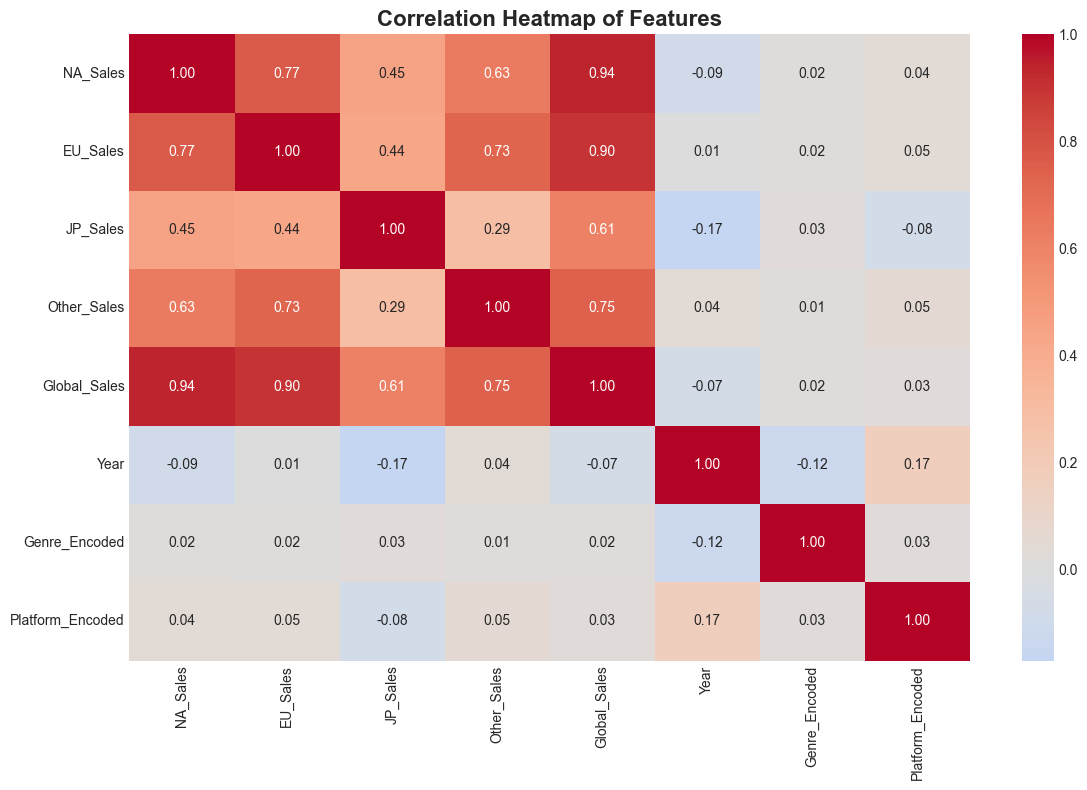


Correlation with Global_Sales:
Global_Sales        1.000000
NA_Sales            0.941268
EU_Sales            0.903271
Other_Sales         0.747974
JP_Sales            0.612794
Platform_Encoded    0.028216
Genre_Encoded       0.022297
Year               -0.074735
Name: Global_Sales, dtype: float64


In [9]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df_clean[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 
                               'Global_Sales', 'Year', 'Genre_Encoded', 'Platform_Encoded']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap of Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nCorrelation with Global_Sales:")
print(correlation_matrix['Global_Sales'].sort_values(ascending=False))


---

# Unit II: Supervised Learning - REGRESSION

## 2.1 Simple Linear Regression
Predicting Global_Sales from NA_Sales


Simple Linear Regression Results:
MAE: 0.2103
MSE: 0.3385
RMSE: 0.5818
R² Score: 0.9208

Coefficient: 1.7386
Intercept: 0.0760


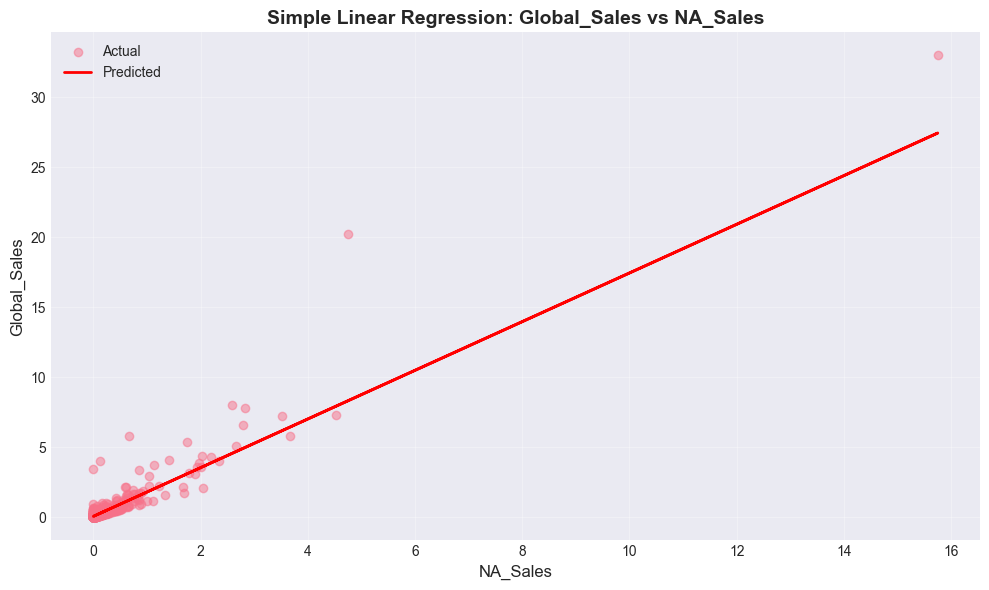

In [10]:
# Simple Linear Regression: Global_Sales ~ NA_Sales
X_simple = X_reg_train[['NA_Sales']].values
X_simple_test = X_reg_test[['NA_Sales']].values

simple_lr = LinearRegression()
simple_lr.fit(X_simple, y_reg_train)

# Predictions
y_simple_pred = simple_lr.predict(X_simple_test)

# Evaluation Metrics
mae_simple = mean_absolute_error(y_reg_test, y_simple_pred)
mse_simple = mean_squared_error(y_reg_test, y_simple_pred)
rmse_simple = np.sqrt(mse_simple)
r2_simple = r2_score(y_reg_test, y_simple_pred)

print("Simple Linear Regression Results:")
print(f"MAE: {mae_simple:.4f}")
print(f"MSE: {mse_simple:.4f}")
print(f"RMSE: {rmse_simple:.4f}")
print(f"R² Score: {r2_simple:.4f}")
print(f"\nCoefficient: {simple_lr.coef_[0]:.4f}")
print(f"Intercept: {simple_lr.intercept_:.4f}")

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_simple_test[:500], y_reg_test[:500], alpha=0.5, label='Actual')
plt.plot(X_simple_test[:500], y_simple_pred[:500], 'r-', label='Predicted', linewidth=2)
plt.xlabel('NA_Sales', fontsize=12)
plt.ylabel('Global_Sales', fontsize=12)
plt.title('Simple Linear Regression: Global_Sales vs NA_Sales', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 2.2 Multiple Linear Regression


Multiple Linear Regression Results:
MAE: 0.0029
MSE: 0.0000
RMSE: 0.0052
R² Score: 1.0000

Feature Coefficients:
            Feature  Coefficient
0          NA_Sales     0.756139
1          EU_Sales     0.441708
2          JP_Sales     0.312921
3       Other_Sales     0.173502
6  Platform_Encoded    -0.000075
5     Genre_Encoded    -0.000008
7          Game_Age     0.000003
4              Year    -0.000003


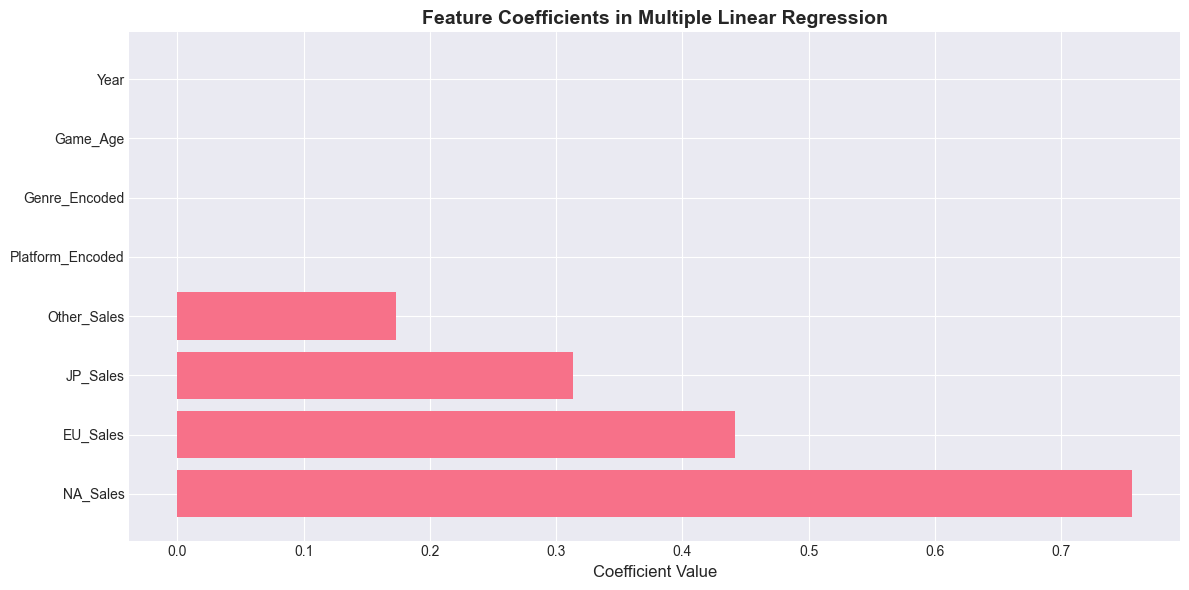

In [11]:
# Multiple Linear Regression
multiple_lr = LinearRegression()
multiple_lr.fit(X_reg_train_scaled, y_reg_train)

# Predictions
y_multiple_pred = multiple_lr.predict(X_reg_test_scaled)

# Evaluation Metrics
mae_multiple = mean_absolute_error(y_reg_test, y_multiple_pred)
mse_multiple = mean_squared_error(y_reg_test, y_multiple_pred)
rmse_multiple = np.sqrt(mse_multiple)
r2_multiple = r2_score(y_reg_test, y_multiple_pred)

print("Multiple Linear Regression Results:")
print(f"MAE: {mae_multiple:.4f}")
print(f"MSE: {mse_multiple:.4f}")
print(f"RMSE: {rmse_multiple:.4f}")
print(f"R² Score: {r2_multiple:.4f}")

# Feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': regression_features,
    'Coefficient': multiple_lr.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nFeature Coefficients:")
print(feature_importance)

# Visualization
plt.figure(figsize=(12, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient Value', fontsize=12)
plt.title('Feature Coefficients in Multiple Linear Regression', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


## 2.3 Polynomial Regression


Polynomial Regression (Degree=3) Results:
MAE: 0.6157
MSE: 4.2752
RMSE: 2.0676
R² Score: -0.0006


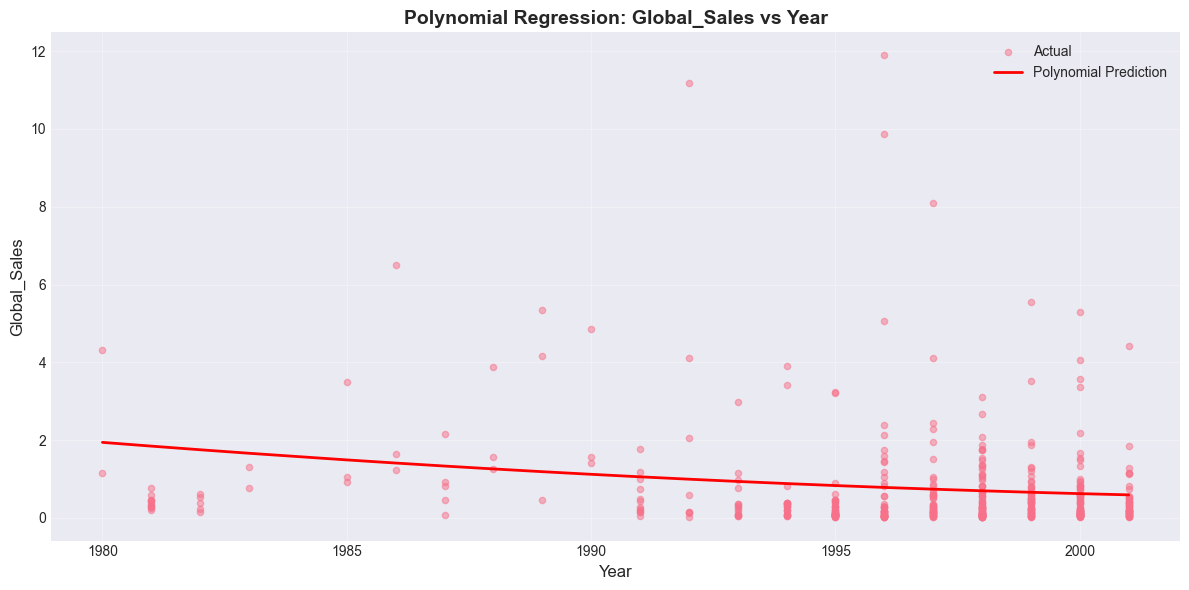

In [12]:
# Polynomial Regression (using Year as feature)
X_poly = X_reg_train[['Year']].values
X_poly_test = X_reg_test[['Year']].values

# Create polynomial features (degree=3)
poly_features = PolynomialFeatures(degree=3)
X_poly_train = poly_features.fit_transform(X_poly)
X_poly_test_transformed = poly_features.transform(X_poly_test)

# Fit polynomial regression
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_reg_train)

# Predictions
y_poly_pred = poly_reg.predict(X_poly_test_transformed)

# Evaluation Metrics
mae_poly = mean_absolute_error(y_reg_test, y_poly_pred)
mse_poly = mean_squared_error(y_reg_test, y_poly_pred)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_reg_test, y_poly_pred)

print("Polynomial Regression (Degree=3) Results:")
print(f"MAE: {mae_poly:.4f}")
print(f"MSE: {mse_poly:.4f}")
print(f"RMSE: {rmse_poly:.4f}")
print(f"R² Score: {r2_poly:.4f}")

# Visualization
plt.figure(figsize=(12, 6))
sorted_indices = np.argsort(X_poly_test.flatten())
plt.scatter(X_poly_test[sorted_indices][:500], y_reg_test.iloc[sorted_indices][:500], 
            alpha=0.5, label='Actual', s=20)
plt.plot(X_poly_test[sorted_indices][:500], y_poly_pred[sorted_indices][:500], 
         'r-', label='Polynomial Prediction', linewidth=2)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Global_Sales', fontsize=12)
plt.title('Polynomial Regression: Global_Sales vs Year', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 2.4 Logistic Regression (for Classification)


In [13]:
# Logistic Regression (though it's classification, it's part of regression unit)
logistic_reg = LogisticRegression(max_iter=1000, random_state=42)
logistic_reg.fit(X_clf_train_scaled, y_clf_train)

# Predictions
y_logistic_pred = logistic_reg.predict(X_clf_test_scaled)
y_logistic_pred_proba = logistic_reg.predict_proba(X_clf_test_scaled)[:, 1]

# Evaluation Metrics
mae_logistic = mean_absolute_error(y_clf_test, y_logistic_pred)
mse_logistic = mean_squared_error(y_clf_test, y_logistic_pred)
rmse_logistic = np.sqrt(mse_logistic)
r2_logistic = r2_score(y_clf_test, y_logistic_pred)

print("Logistic Regression Results:")
print(f"MAE: {mae_logistic:.4f}")
print(f"MSE: {mse_logistic:.4f}")
print(f"RMSE: {rmse_logistic:.4f}")
print(f"R² Score: {r2_logistic:.4f}")
print(f"\nAccuracy: {accuracy_score(y_clf_test, y_logistic_pred):.4f}")


Logistic Regression Results:
MAE: 0.0034
MSE: 0.0034
RMSE: 0.0580
R² Score: 0.9694

Accuracy: 0.9966


## 2.5 Regression Models Comparison


Regression Models Comparison:
        Model      MAE      MSE     RMSE  R² Score
    Simple LR 0.210316 0.338531 0.581834  0.920766
  Multiple LR 0.002907 0.000027 0.005210  0.999994
Polynomial LR 0.615727 4.275152 2.067644 -0.000611
  Logistic LR 0.003368 0.003368 0.058035  0.969447


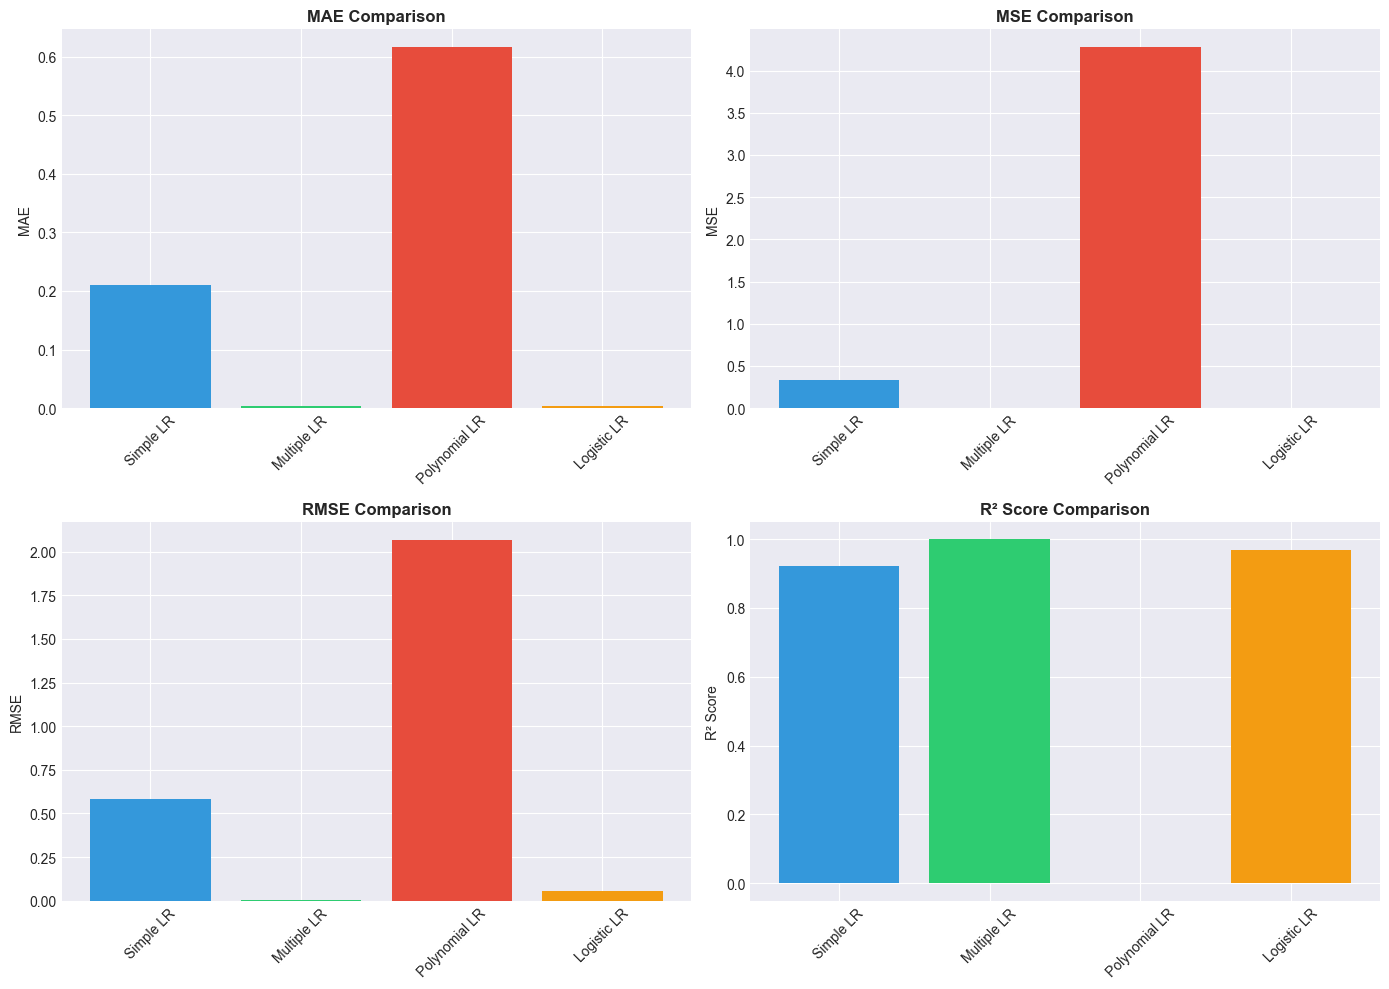

In [14]:
# Compare all regression models
regression_comparison = pd.DataFrame({
    'Model': ['Simple LR', 'Multiple LR', 'Polynomial LR', 'Logistic LR'],
    'MAE': [mae_simple, mae_multiple, mae_poly, mae_logistic],
    'MSE': [mse_simple, mse_multiple, mse_poly, mse_logistic],
    'RMSE': [rmse_simple, rmse_multiple, rmse_poly, rmse_logistic],
    'R² Score': [r2_simple, r2_multiple, r2_poly, r2_logistic]
})

print("Regression Models Comparison:")
print(regression_comparison.to_string(index=False))

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

metrics = ['MAE', 'MSE', 'RMSE', 'R² Score']
for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    ax.bar(regression_comparison['Model'], regression_comparison[metric], color=['#3498db', '#2ecc71', '#e74c3c', '#f39c12'])
    ax.set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


---

# Unit III: Supervised Learning - CLASSIFICATION

## 3.1 K-Nearest Neighbors (KNN) - Lazy Learning


K-Nearest Neighbors Results:
Accuracy: 0.9813
Precision: 0.9808
Recall: 0.8689
F1 Score: 0.9215
Log Loss: 0.1423
ROC-AUC Score: 0.9864

Confusion Matrix:
[[2847    7]
 [  54  358]]


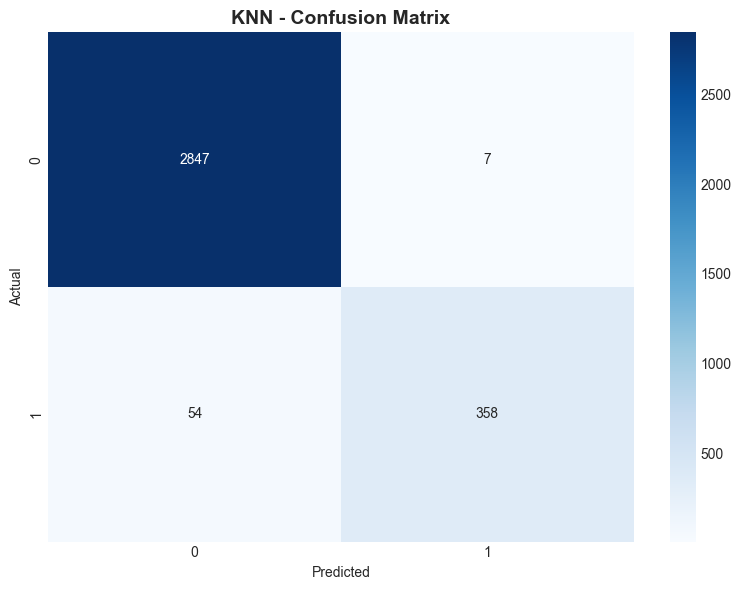

In [15]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_clf_train_scaled, y_clf_train)

# Predictions
y_knn_pred = knn.predict(X_clf_test_scaled)
y_knn_pred_proba = knn.predict_proba(X_clf_test_scaled)[:, 1]

# Evaluation Metrics
accuracy_knn = accuracy_score(y_clf_test, y_knn_pred)
precision_knn = precision_score(y_clf_test, y_knn_pred)
recall_knn = recall_score(y_clf_test, y_knn_pred)
f1_knn = f1_score(y_clf_test, y_knn_pred)
log_loss_knn = log_loss(y_clf_test, y_knn_pred_proba)
roc_auc_knn = roc_auc_score(y_clf_test, y_knn_pred_proba)
cm_knn = confusion_matrix(y_clf_test, y_knn_pred)

print("K-Nearest Neighbors Results:")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1 Score: {f1_knn:.4f}")
print(f"Log Loss: {log_loss_knn:.4f}")
print(f"ROC-AUC Score: {roc_auc_knn:.4f}")
print(f"\nConfusion Matrix:\n{cm_knn}")

# Visualization - Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('KNN - Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()


## 3.2 Naïve Bayes


Naïve Bayes Results:
Accuracy: 0.9679
Precision: 0.8089
Recall: 0.9757
F1 Score: 0.8845
Log Loss: 0.2532
ROC-AUC Score: 0.9948

Confusion Matrix:
[[2759   95]
 [  10  402]]


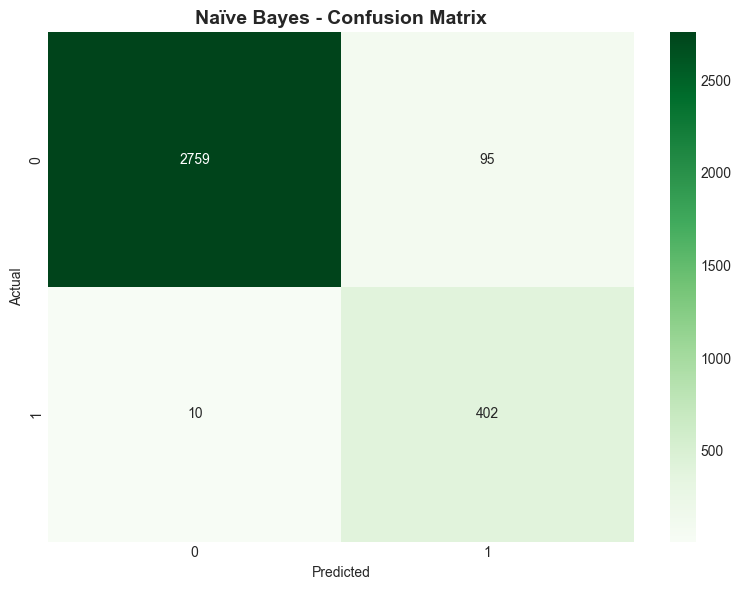

In [16]:
# Naïve Bayes
nb = GaussianNB()
nb.fit(X_clf_train_scaled, y_clf_train)

# Predictions
y_nb_pred = nb.predict(X_clf_test_scaled)
y_nb_pred_proba = nb.predict_proba(X_clf_test_scaled)[:, 1]

# Evaluation Metrics
accuracy_nb = accuracy_score(y_clf_test, y_nb_pred)
precision_nb = precision_score(y_clf_test, y_nb_pred)
recall_nb = recall_score(y_clf_test, y_nb_pred)
f1_nb = f1_score(y_clf_test, y_nb_pred)
log_loss_nb = log_loss(y_clf_test, y_nb_pred_proba)
roc_auc_nb = roc_auc_score(y_clf_test, y_nb_pred_proba)
cm_nb = confusion_matrix(y_clf_test, y_nb_pred)

print("Naïve Bayes Results:")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print(f"F1 Score: {f1_nb:.4f}")
print(f"Log Loss: {log_loss_nb:.4f}")
print(f"ROC-AUC Score: {roc_auc_nb:.4f}")
print(f"\nConfusion Matrix:\n{cm_nb}")

# Visualization - Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens', cbar=True)
plt.title('Naïve Bayes - Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()


## 3.3 Decision Trees - Divide and Conquer


Decision Tree Results:
Accuracy: 0.9865
Precision: 0.9694
Recall: 0.9223
F1 Score: 0.9453
Log Loss: 0.0956
ROC-AUC Score: 0.9814

Confusion Matrix:
[[2842   12]
 [  32  380]]

Feature Importance:
            Feature  Importance
0          NA_Sales    0.736631
1          EU_Sales    0.157074
2          JP_Sales    0.088061
3       Other_Sales    0.016989
7          Game_Age    0.000844
6  Platform_Encoded    0.000400
5     Genre_Encoded    0.000000
4              Year    0.000000


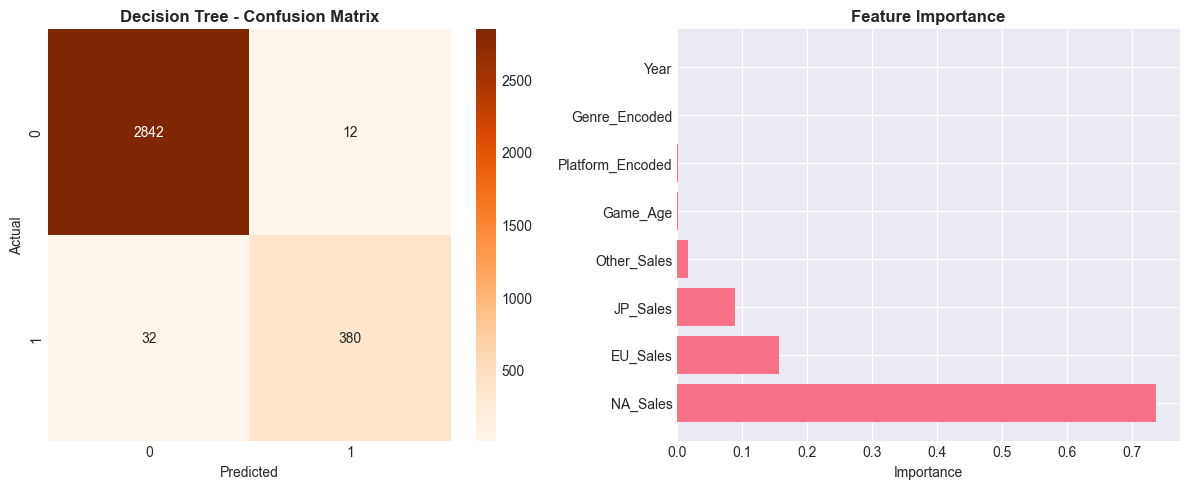

In [17]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_clf_train_scaled, y_clf_train)

# Predictions
y_dt_pred = dt.predict(X_clf_test_scaled)
y_dt_pred_proba = dt.predict_proba(X_clf_test_scaled)[:, 1]

# Evaluation Metrics
accuracy_dt = accuracy_score(y_clf_test, y_dt_pred)
precision_dt = precision_score(y_clf_test, y_dt_pred)
recall_dt = recall_score(y_clf_test, y_dt_pred)
f1_dt = f1_score(y_clf_test, y_dt_pred)
log_loss_dt = log_loss(y_clf_test, y_dt_pred_proba)
roc_auc_dt = roc_auc_score(y_clf_test, y_dt_pred_proba)
cm_dt = confusion_matrix(y_clf_test, y_dt_pred)

print("Decision Tree Results:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1 Score: {f1_dt:.4f}")
print(f"Log Loss: {log_loss_dt:.4f}")
print(f"ROC-AUC Score: {roc_auc_dt:.4f}")
print(f"\nConfusion Matrix:\n{cm_dt}")

# Feature Importance
feature_importance_dt = pd.DataFrame({
    'Feature': classification_features,
    'Importance': dt.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance_dt)

# Visualization - Confusion Matrix
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges', cbar=True)
plt.title('Decision Tree - Confusion Matrix', fontsize=12, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.subplot(1, 2, 2)
plt.barh(feature_importance_dt['Feature'], feature_importance_dt['Importance'])
plt.xlabel('Importance', fontsize=10)
plt.title('Feature Importance', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()


## 3.4 Support Vector Machine (SVM)


Support Vector Machine Results:
Accuracy: 0.9890
Precision: 0.9921
Recall: 0.9199
F1 Score: 0.9547
Log Loss: 0.0196
ROC-AUC Score: 0.9995

Confusion Matrix:
[[2851    3]
 [  33  379]]


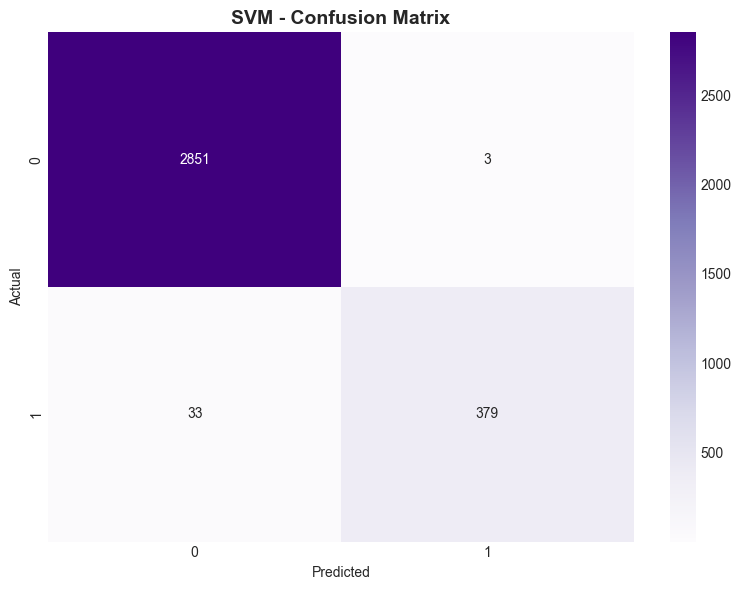

In [18]:
# Support Vector Machine (using smaller sample for faster training)
# Sample data for faster SVM training
sample_size = min(5000, len(X_clf_train_scaled))
indices = np.random.choice(len(X_clf_train_scaled), sample_size, replace=False)

svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_clf_train_scaled[indices], y_clf_train.iloc[indices])

# Predictions
y_svm_pred = svm.predict(X_clf_test_scaled)
y_svm_pred_proba = svm.predict_proba(X_clf_test_scaled)[:, 1]

# Evaluation Metrics
accuracy_svm = accuracy_score(y_clf_test, y_svm_pred)
precision_svm = precision_score(y_clf_test, y_svm_pred)
recall_svm = recall_score(y_clf_test, y_svm_pred)
f1_svm = f1_score(y_clf_test, y_svm_pred)
log_loss_svm = log_loss(y_clf_test, y_svm_pred_proba)
roc_auc_svm = roc_auc_score(y_clf_test, y_svm_pred_proba)
cm_svm = confusion_matrix(y_clf_test, y_svm_pred)

print("Support Vector Machine Results:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1 Score: {f1_svm:.4f}")
print(f"Log Loss: {log_loss_svm:.4f}")
print(f"ROC-AUC Score: {roc_auc_svm:.4f}")
print(f"\nConfusion Matrix:\n{cm_svm}")

# Visualization - Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Purples', cbar=True)
plt.title('SVM - Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()


## 3.5 Classification Models Comparison and ROC Curves


Classification Models Comparison:
        Model  Accuracy  Precision   Recall  F1 Score  ROC-AUC  Log Loss
          KNN  0.981323   0.980822 0.868932  0.921493 0.986359  0.142268
  Naïve Bayes  0.967851   0.808853 0.975728  0.884488 0.994837  0.253171
Decision Tree  0.986528   0.969388 0.922330  0.945274 0.981387  0.095615
          SVM  0.988977   0.992147 0.919903  0.954660 0.999510  0.019623


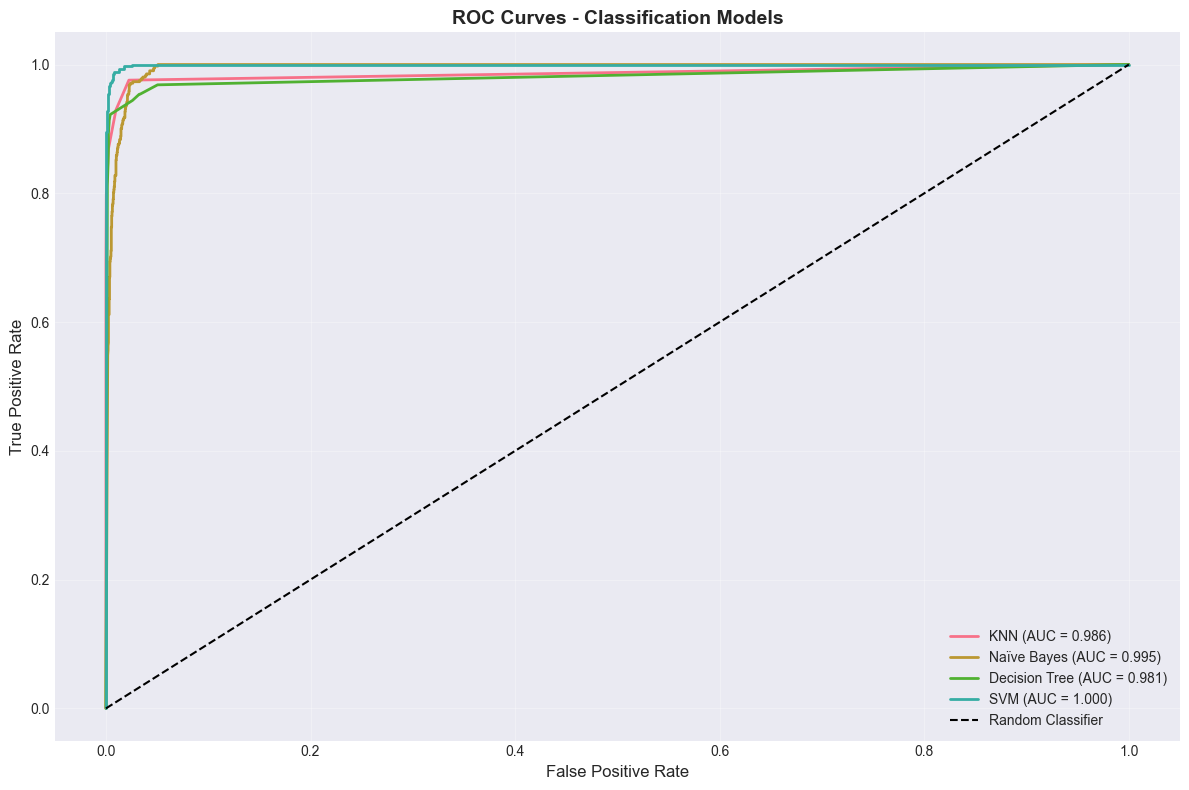

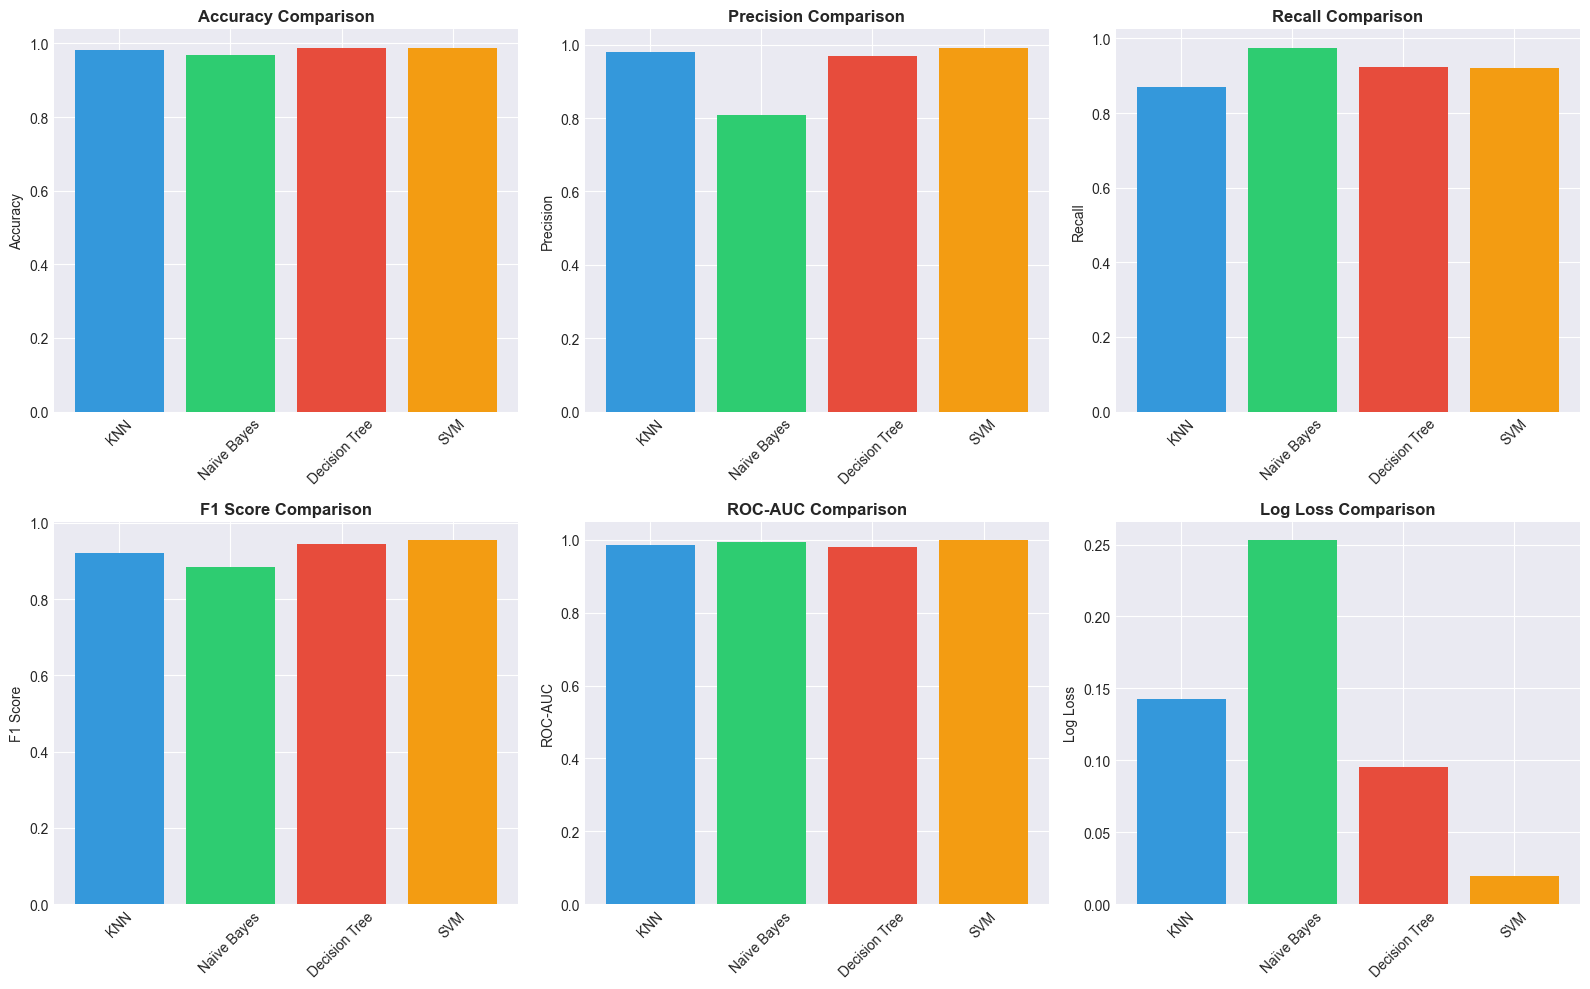

In [19]:
# Compare all classification models
classification_comparison = pd.DataFrame({
    'Model': ['KNN', 'Naïve Bayes', 'Decision Tree', 'SVM'],
    'Accuracy': [accuracy_knn, accuracy_nb, accuracy_dt, accuracy_svm],
    'Precision': [precision_knn, precision_nb, precision_dt, precision_svm],
    'Recall': [recall_knn, recall_nb, recall_dt, recall_svm],
    'F1 Score': [f1_knn, f1_nb, f1_dt, f1_svm],
    'ROC-AUC': [roc_auc_knn, roc_auc_nb, roc_auc_dt, roc_auc_svm],
    'Log Loss': [log_loss_knn, log_loss_nb, log_loss_dt, log_loss_svm]
})

print("Classification Models Comparison:")
print(classification_comparison.to_string(index=False))

# ROC Curves
plt.figure(figsize=(12, 8))

models = {
    'KNN': (y_knn_pred_proba, roc_auc_knn),
    'Naïve Bayes': (y_nb_pred_proba, roc_auc_nb),
    'Decision Tree': (y_dt_pred_proba, roc_auc_dt),
    'SVM': (y_svm_pred_proba, roc_auc_svm)
}

for name, (proba, auc) in models.items():
    fpr, tpr, _ = roc_curve(y_clf_test, proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - Classification Models', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Metrics Comparison Visualization
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
metrics_list = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC', 'Log Loss']

for idx, metric in enumerate(metrics_list):
    ax = axes[idx // 3, idx % 3]
    ax.bar(classification_comparison['Model'], classification_comparison[metric], 
           color=['#3498db', '#2ecc71', '#e74c3c', '#f39c12'])
    ax.set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


---

# Unit IV: Unsupervised Learning - CLUSTERING AND PATTERN DETECTION

## 4.1 K-Means Clustering


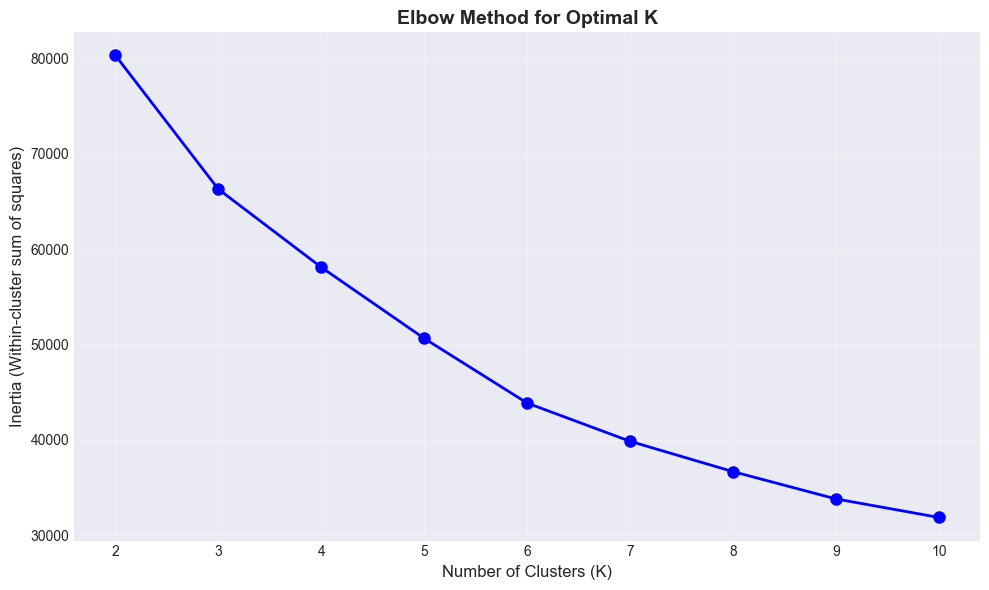


Elbow method completed. Optimal K appears to be around 4-5 clusters.


In [20]:
# Prepare data for clustering
clustering_features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Year', 'Genre_Encoded', 'Platform_Encoded']
X_cluster = df_clean[clustering_features].dropna()

# Scale the data
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

# Elbow Method to find optimal K
inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster_scaled)
    inertias.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Inertia (Within-cluster sum of squares)', fontsize=12)
plt.title('Elbow Method for Optimal K', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nElbow method completed. Optimal K appears to be around 4-5 clusters.")


K-Means Clustering with K=5:

Cluster distribution:
Cluster
0    2986
1    4724
2      72
3    3901
4    4644
Name: count, dtype: int64

Cluster Centers:
   NA_Sales  EU_Sales  JP_Sales         Year  Genre_Encoded  Platform_Encoded
0  0.356104  0.171362  0.205291  1997.415328       6.037483         13.924364
1  0.207807  0.129401  0.032223  2009.301228       1.216977         21.039585
2  7.956111  4.804861  2.729583  2004.361111       5.472222         14.138889
3  0.143829  0.057102  0.047587  2007.295717       4.376507          4.647858
4  0.248510  0.154438  0.029414  2008.531869       8.436477         21.051464


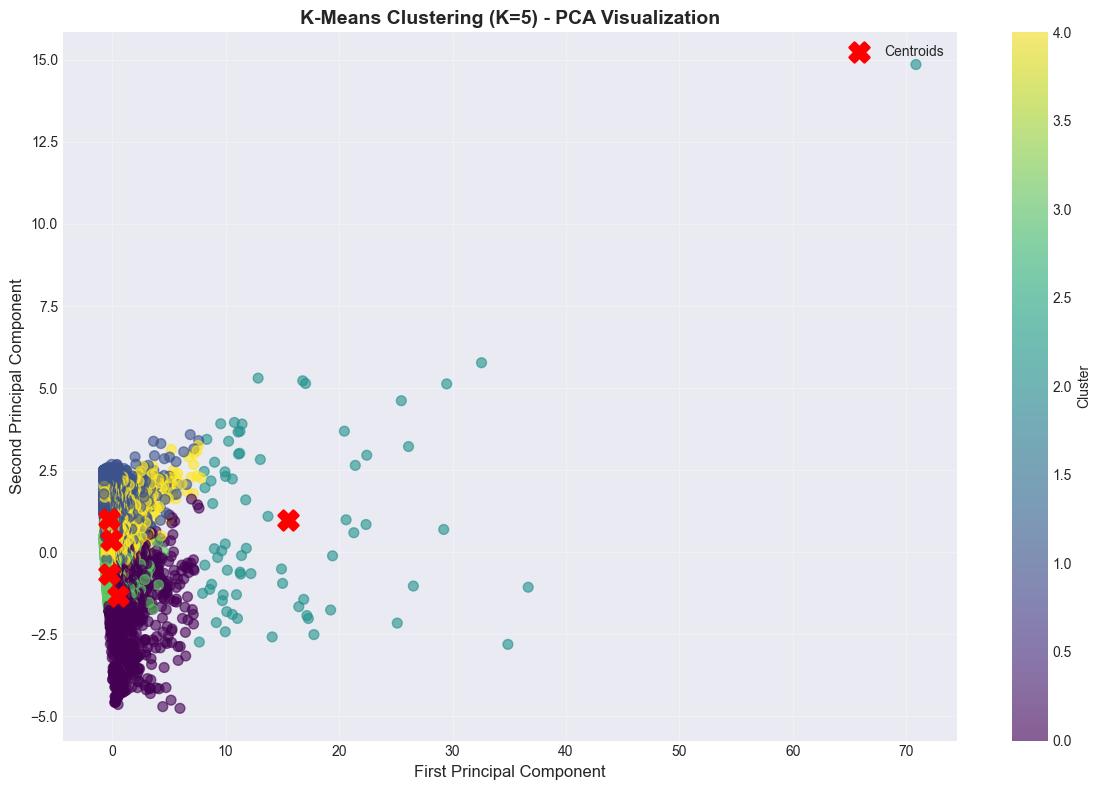

In [21]:
# Apply K-Means with optimal K (let's use K=5)
optimal_k = 5
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_cluster_scaled)

# Add cluster labels to dataframe
df_clustered = X_cluster.copy()
df_clustered['Cluster'] = cluster_labels
df_clustered['Global_Sales'] = df_clean.loc[X_cluster.index, 'Global_Sales'].values

print(f"K-Means Clustering with K={optimal_k}:")
print(f"\nCluster distribution:")
print(df_clustered['Cluster'].value_counts().sort_index())

# Cluster centers
print(f"\nCluster Centers:")
cluster_centers_df = pd.DataFrame(
    scaler_cluster.inverse_transform(kmeans_final.cluster_centers_),
    columns=clustering_features
)
print(cluster_centers_df)

# Visualization using PCA (2D projection)
pca_vis = PCA(n_components=2)
X_cluster_pca = pca_vis.fit_transform(X_cluster_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_cluster_pca[:, 0], X_cluster_pca[:, 1], c=cluster_labels, 
                     cmap='viridis', alpha=0.6, s=50)
plt.scatter(pca_vis.transform(kmeans_final.cluster_centers_)[:, 0], 
           pca_vis.transform(kmeans_final.cluster_centers_)[:, 1], 
           c='red', marker='X', s=200, label='Centroids', linewidths=2)
plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)
plt.title(f'K-Means Clustering (K={optimal_k}) - PCA Visualization', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 4.2 Hierarchical Clustering - Agglomerative


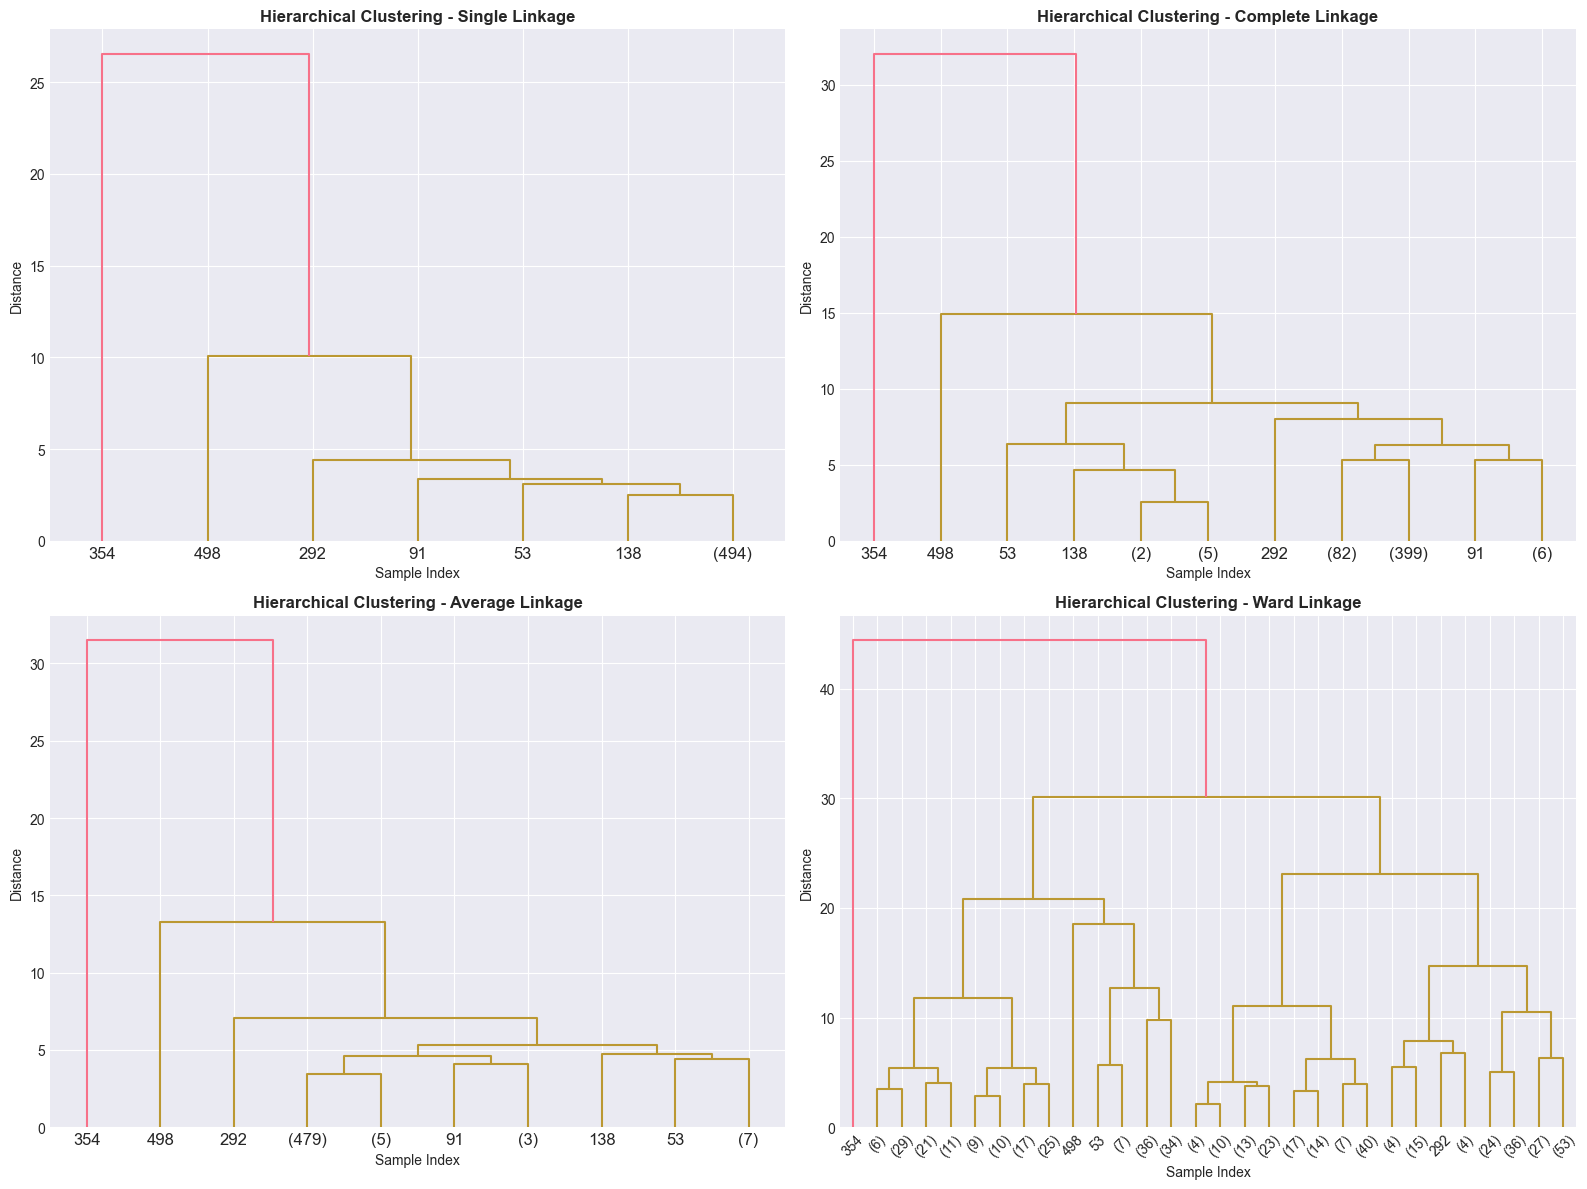


Single Linkage - Cluster distribution:
0    496
1      1
2      1
3      1
4      1
Name: count, dtype: int64

Complete Linkage - Cluster distribution:
0      9
1    488
2      1
3      1
4      1
Name: count, dtype: int64

Average Linkage - Cluster distribution:
0      9
1    488
2      1
3      1
4      1
Name: count, dtype: int64


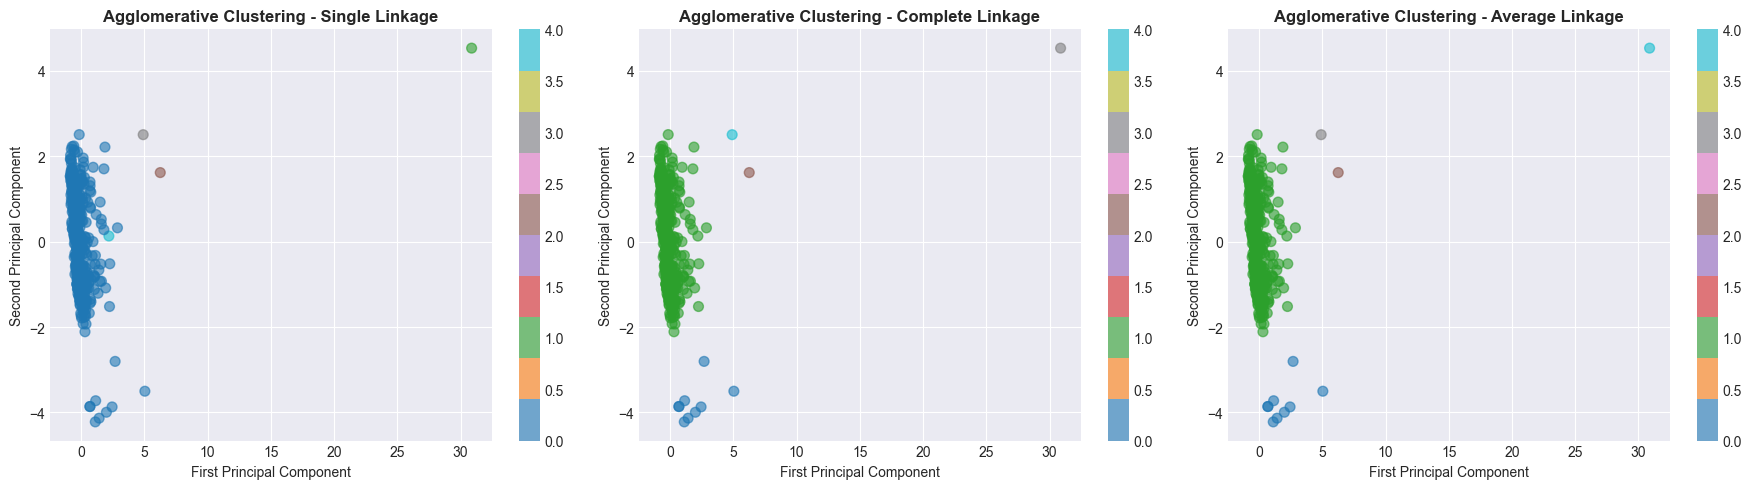

In [22]:
# Use a sample for hierarchical clustering (it's computationally expensive)
sample_size_hc = min(500, len(X_cluster_scaled))
indices_hc = np.random.choice(len(X_cluster_scaled), sample_size_hc, replace=False)
X_hc_sample = X_cluster_scaled[indices_hc]

# Different linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

for idx, method in enumerate(linkage_methods):
    ax = axes[idx // 2, idx % 2]
    
    # Create linkage matrix
    if method == 'ward':
        linkage_matrix = linkage(X_hc_sample, method=method)
    else:
        linkage_matrix = linkage(X_hc_sample, method=method)
    
    # Plot dendrogram
    dendrogram(linkage_matrix, ax=ax, truncate_mode='level', p=5)
    ax.set_title(f'Hierarchical Clustering - {method.capitalize()} Linkage', fontsize=12, fontweight='bold')
    ax.set_xlabel('Sample Index')
    ax.set_ylabel('Distance')

plt.tight_layout()
plt.show()

# Apply Agglomerative Clustering with different linkages
n_clusters_hc = 5
results_hc = {}

for method in ['single', 'complete', 'average']:
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters_hc, linkage=method)
    labels_hc = agg_clustering.fit_predict(X_hc_sample)
    results_hc[method] = labels_hc
    print(f"\n{method.capitalize()} Linkage - Cluster distribution:")
    print(pd.Series(labels_hc).value_counts().sort_index())

# Visualization of Agglomerative Clustering results
pca_hc = PCA(n_components=2)
X_hc_pca = pca_hc.fit_transform(X_hc_sample)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, method in enumerate(['single', 'complete', 'average']):
    ax = axes[idx]
    scatter = ax.scatter(X_hc_pca[:, 0], X_hc_pca[:, 1], c=results_hc[method], 
                        cmap='tab10', alpha=0.6, s=50)
    ax.set_title(f'Agglomerative Clustering - {method.capitalize()} Linkage', fontsize=12, fontweight='bold')
    ax.set_xlabel('First Principal Component')
    ax.set_ylabel('Second Principal Component')
    plt.colorbar(scatter, ax=ax)

plt.tight_layout()
plt.show()


## 4.3 Association Rules - Market Basket Analysis


Top 20 Association Rules (Market Basket Analysis):
      Antecedent       Consequent  Support  Confidence     Lift
    Genre_Puzzle      Platform_DS 0.014455    0.413310 3.163672
     Platform_DS     Genre_Puzzle 0.014455    0.110642 3.163672
     Platform_DS Genre_Simulation 0.017150    0.131271 2.518512
Genre_Simulation      Platform_DS 0.017150    0.329025 2.518512
   Platform_X360    Genre_Shooter 0.012066    0.159514 2.031504
   Genre_Shooter    Platform_X360 0.012066    0.153666 2.031504
    Platform_Wii       Genre_Misc 0.016660    0.210853 2.013212
      Genre_Misc     Platform_Wii 0.016660    0.159064 2.013212
    Platform_3DS     Genre_Action 0.011025    0.360000 1.806861
    Genre_Action     Platform_3DS 0.011025    0.055334 1.806861
     Platform_DS       Genre_Misc 0.023826    0.182372 1.741282
      Genre_Misc      Platform_DS 0.023826    0.227485 1.741282
    Platform_PS3     Genre_Action 0.022846    0.286043 1.435667
    Genre_Action     Platform_PS3 0.022846    0.11466

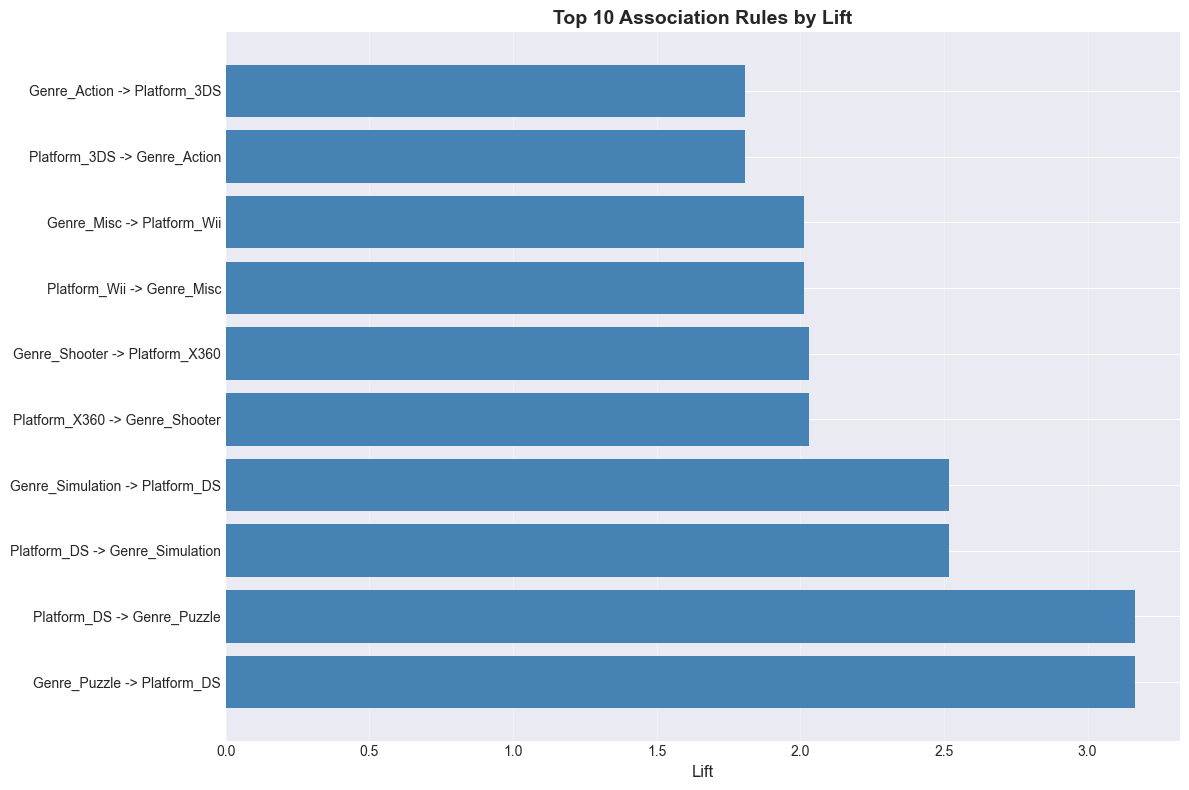

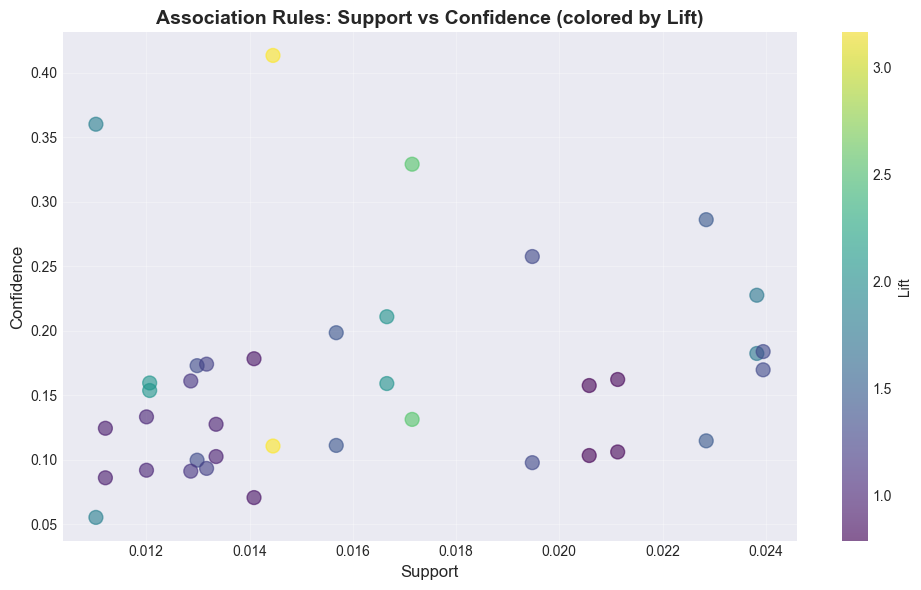

In [23]:
# Market Basket Analysis using Genre and Platform
# Create transaction-like data
transactions = df_clean[['Genre', 'Platform']].dropna()

# Create binary matrix for association rules
# Get unique genres and platforms
genres = df_clean['Genre'].unique()
platforms = df_clean['Platform'].unique()

# Create binary features
association_data = pd.DataFrame()
for genre in genres[:10]:  # Top 10 genres
    association_data[f'Genre_{genre}'] = (df_clean['Genre'] == genre).astype(int)

for platform in platforms[:10]:  # Top 10 platforms
    association_data[f'Platform_{platform}'] = (df_clean['Platform'] == platform).astype(int)

# Simple Association Rules Analysis
# Calculate support, confidence, and lift manually

def calculate_association_rules(data, min_support=0.01):
    rules = []
    columns = data.columns.tolist()
    
    for i, col1 in enumerate(columns):
        for col2 in columns[i+1:]:
            # Support of A and B
            support_ab = (data[col1] & data[col2]).sum() / len(data)
            
            if support_ab >= min_support:
                # Support of A
                support_a = data[col1].sum() / len(data)
                # Support of B
                support_b = data[col2].sum() / len(data)
                
                # Confidence A -> B
                confidence_ab = support_ab / support_a if support_a > 0 else 0
                # Confidence B -> A
                confidence_ba = support_ab / support_b if support_b > 0 else 0
                
                # Lift
                lift_ab = confidence_ab / support_b if support_b > 0 else 0
                lift_ba = confidence_ba / support_a if support_a > 0 else 0
                
                rules.append({
                    'Antecedent': col1,
                    'Consequent': col2,
                    'Support': support_ab,
                    'Confidence': confidence_ab,
                    'Lift': lift_ab
                })
                
                rules.append({
                    'Antecedent': col2,
                    'Consequent': col1,
                    'Support': support_ab,
                    'Confidence': confidence_ba,
                    'Lift': lift_ba
                })
    
    return pd.DataFrame(rules)

# Calculate association rules
rules_df = calculate_association_rules(association_data, min_support=0.01)
rules_df = rules_df.sort_values('Lift', ascending=False)

print("Top 20 Association Rules (Market Basket Analysis):")
print("="*80)
print(rules_df.head(20).to_string(index=False))

# Visualization of top rules
top_rules = rules_df.head(10)
plt.figure(figsize=(12, 8))
plt.barh(range(len(top_rules)), top_rules['Lift'], color='steelblue')
plt.yticks(range(len(top_rules)), 
           [f"{row['Antecedent']} -> {row['Consequent']}" for _, row in top_rules.iterrows()])
plt.xlabel('Lift', fontsize=12)
plt.title('Top 10 Association Rules by Lift', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# Support vs Confidence scatter
plt.figure(figsize=(10, 6))
plt.scatter(rules_df['Support'], rules_df['Confidence'], 
           c=rules_df['Lift'], cmap='viridis', alpha=0.6, s=100)
plt.colorbar(label='Lift')
plt.xlabel('Support', fontsize=12)
plt.ylabel('Confidence', fontsize=12)
plt.title('Association Rules: Support vs Confidence (colored by Lift)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


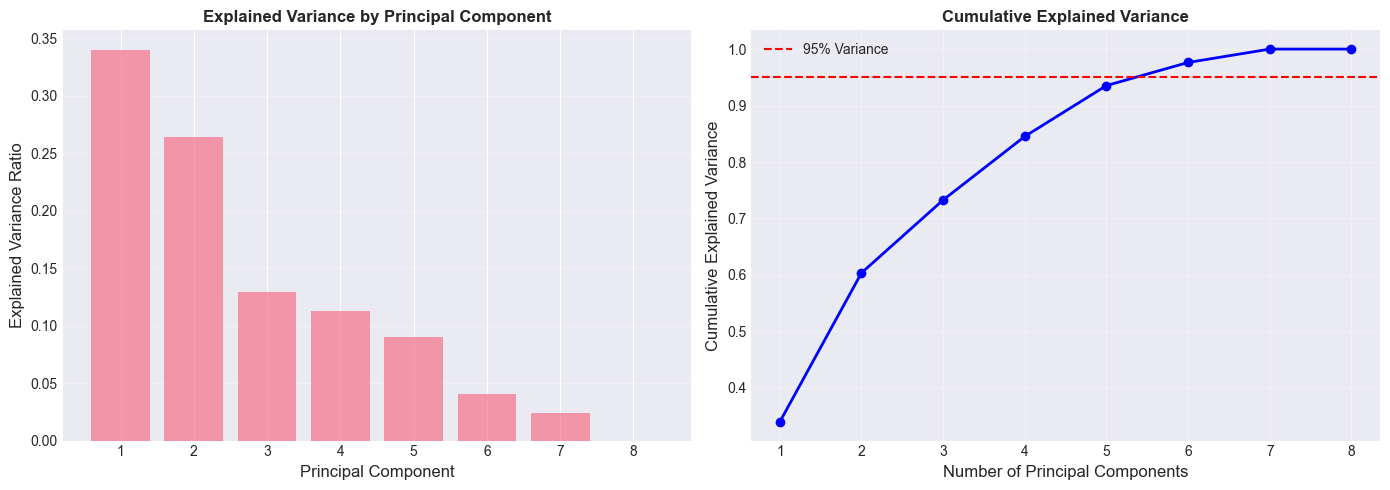


Number of components for 95% variance: 6
First 3 components explain 73.28% of variance


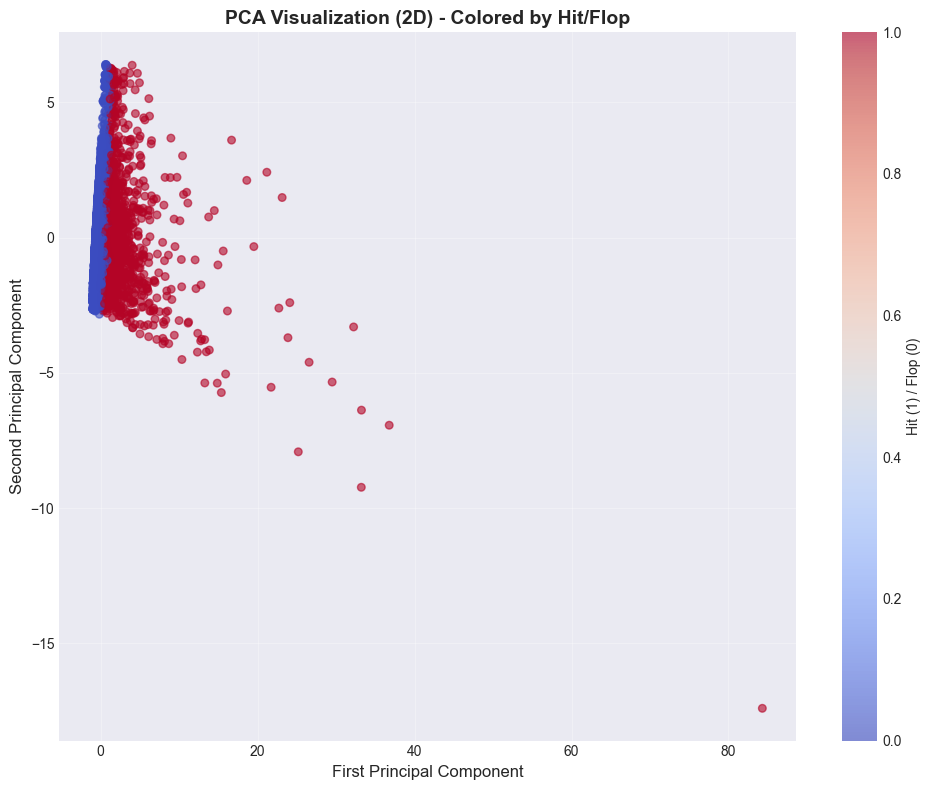

In [24]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_clf_train_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Visualization - Explained Variance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Individual explained variance
axes[0].bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7)
axes[0].set_xlabel('Principal Component', fontsize=12)
axes[0].set_ylabel('Explained Variance Ratio', fontsize=12)
axes[0].set_title('Explained Variance by Principal Component', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Cumulative explained variance
axes[1].plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'bo-', linewidth=2, markersize=6)
axes[1].axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
axes[1].set_xlabel('Number of Principal Components', fontsize=12)
axes[1].set_ylabel('Cumulative Explained Variance', fontsize=12)
axes[1].set_title('Cumulative Explained Variance', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find number of components for 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nNumber of components for 95% variance: {n_components_95}")
print(f"First 3 components explain {cumulative_variance[2]:.2%} of variance")

# Apply PCA with 2 components for visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_clf_train_scaled)

# Visualize in 2D PCA space
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_clf_train, 
                     cmap='coolwarm', alpha=0.6, s=30)
plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)
plt.title('PCA Visualization (2D) - Colored by Hit/Flop', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Hit (1) / Flop (0)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 5.2 Feedforward Neural Network / Multi-Layer Perceptron (MLP)


MLP Classifier Results:
Accuracy: 0.9957
Precision: 0.9975
Recall: 0.9684
F1 Score: 0.9828
ROC-AUC Score: 0.9999

Number of iterations: 29
Loss: 0.0036

MLP Regressor Results:
MAE: 0.0151
MSE: 0.0009
RMSE: 0.0307
R² Score: 0.9998


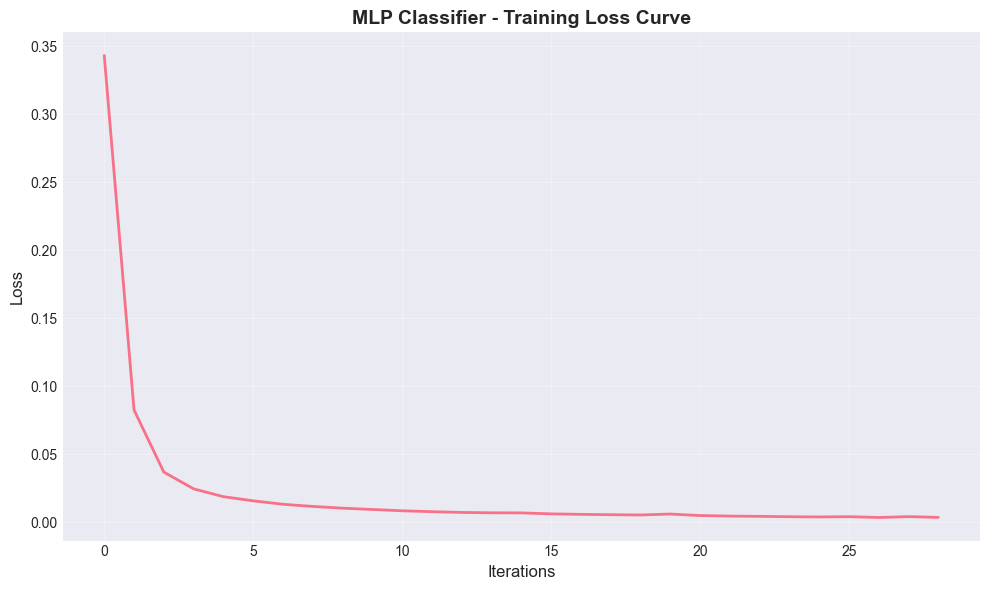

In [25]:
# MLP Classifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42, 
                        early_stopping=True, validation_fraction=0.1)
mlp_clf.fit(X_clf_train_scaled, y_clf_train)

# Predictions
y_mlp_clf_pred = mlp_clf.predict(X_clf_test_scaled)
y_mlp_clf_pred_proba = mlp_clf.predict_proba(X_clf_test_scaled)[:, 1]

# Evaluation Metrics
accuracy_mlp_clf = accuracy_score(y_clf_test, y_mlp_clf_pred)
precision_mlp_clf = precision_score(y_clf_test, y_mlp_clf_pred)
recall_mlp_clf = recall_score(y_clf_test, y_mlp_clf_pred)
f1_mlp_clf = f1_score(y_clf_test, y_mlp_clf_pred)
roc_auc_mlp_clf = roc_auc_score(y_clf_test, y_mlp_clf_pred_proba)

print("MLP Classifier Results:")
print(f"Accuracy: {accuracy_mlp_clf:.4f}")
print(f"Precision: {precision_mlp_clf:.4f}")
print(f"Recall: {recall_mlp_clf:.4f}")
print(f"F1 Score: {f1_mlp_clf:.4f}")
print(f"ROC-AUC Score: {roc_auc_mlp_clf:.4f}")
print(f"\nNumber of iterations: {mlp_clf.n_iter_}")
print(f"Loss: {mlp_clf.loss_:.4f}")

# MLP Regressor
mlp_reg = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42,
                      early_stopping=True, validation_fraction=0.1)
mlp_reg.fit(X_reg_train_scaled, y_reg_train)

# Predictions
y_mlp_reg_pred = mlp_reg.predict(X_reg_test_scaled)

# Evaluation Metrics
mae_mlp_reg = mean_absolute_error(y_reg_test, y_mlp_reg_pred)
mse_mlp_reg = mean_squared_error(y_reg_test, y_mlp_reg_pred)
rmse_mlp_reg = np.sqrt(mse_mlp_reg)
r2_mlp_reg = r2_score(y_reg_test, y_mlp_reg_pred)

print("\n" + "="*50)
print("MLP Regressor Results:")
print(f"MAE: {mae_mlp_reg:.4f}")
print(f"MSE: {mse_mlp_reg:.4f}")
print(f"RMSE: {rmse_mlp_reg:.4f}")
print(f"R² Score: {r2_mlp_reg:.4f}")

# Visualization - Loss curve
if hasattr(mlp_clf, 'loss_curve_'):
    plt.figure(figsize=(10, 6))
    plt.plot(mlp_clf.loss_curve_, linewidth=2)
    plt.xlabel('Iterations', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.title('MLP Classifier - Training Loss Curve', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


---

# Unit VI: Model Performance

## 6.1 Bias-Variance Trade-off Analysis


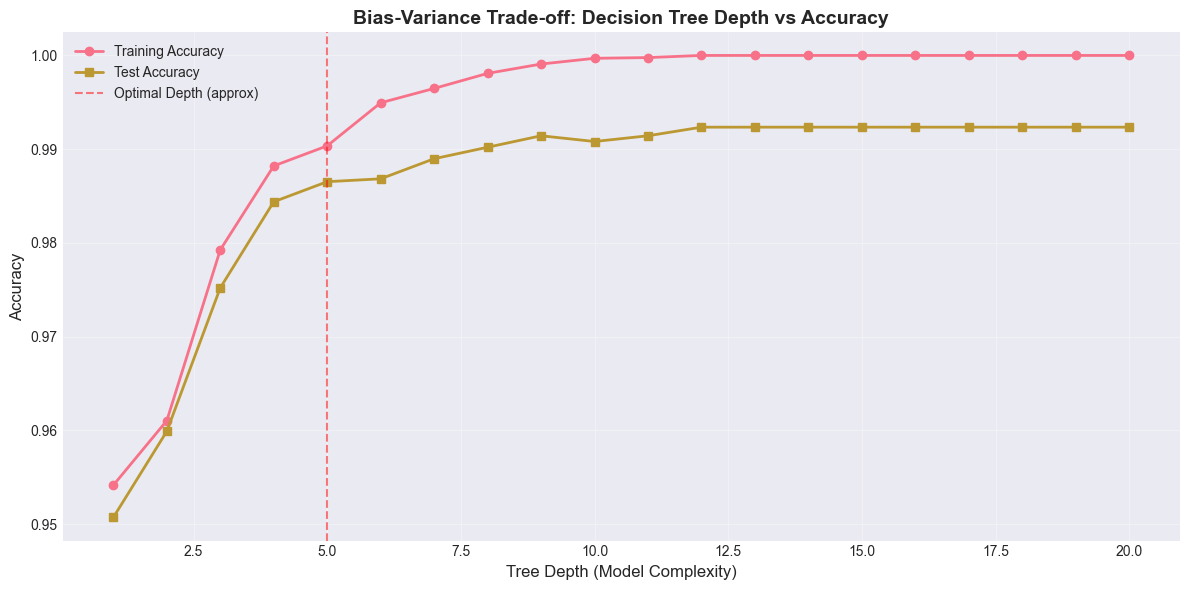


Bias-Variance Trade-off Analysis:
--------------------------------------------------
Low Depth (1-3): High Bias, Low Variance (Underfitting)
Medium Depth (4-8): Balanced Bias-Variance
High Depth (15+): Low Bias, High Variance (Overfitting)

Best test accuracy at depth: 12
Best test accuracy: 0.9923


In [26]:
# Demonstrate Bias-Variance Trade-off using Decision Trees with different depths
depths = range(1, 21)
train_scores = []
test_scores = []

for depth in depths:
    dt_temp = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_temp.fit(X_clf_train_scaled, y_clf_train)
    
    train_pred = dt_temp.predict(X_clf_train_scaled)
    test_pred = dt_temp.predict(X_clf_test_scaled)
    
    train_scores.append(accuracy_score(y_clf_train, train_pred))
    test_scores.append(accuracy_score(y_clf_test, test_pred))

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(depths, train_scores, 'o-', label='Training Accuracy', linewidth=2, markersize=6)
plt.plot(depths, test_scores, 's-', label='Test Accuracy', linewidth=2, markersize=6)
plt.xlabel('Tree Depth (Model Complexity)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Bias-Variance Trade-off: Decision Tree Depth vs Accuracy', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.axvline(x=5, color='r', linestyle='--', alpha=0.5, label='Optimal Depth (approx)')
plt.legend()
plt.tight_layout()
plt.show()

print("\nBias-Variance Trade-off Analysis:")
print("-" * 50)
print("Low Depth (1-3): High Bias, Low Variance (Underfitting)")
print("Medium Depth (4-8): Balanced Bias-Variance")
print("High Depth (15+): Low Bias, High Variance (Overfitting)")
print(f"\nBest test accuracy at depth: {depths[np.argmax(test_scores)]}")
print(f"Best test accuracy: {max(test_scores):.4f}")


## 6.2 Cross-Validation Methods


Logistic Regression - K-Fold CV (K=5):
  Mean Accuracy: 0.9982 (+/- 0.0013)
  Individual scores: [0.9992346  0.99770291 0.99846861 0.99732006 0.99808576]
Decision Tree - K-Fold CV (K=5):
  Mean Accuracy: 0.9870 (+/- 0.0038)
  Individual scores: [0.98737084 0.99042879 0.98660031 0.98545176 0.98506891]
KNN - K-Fold CV (K=5):
  Mean Accuracy: 0.9815 (+/- 0.0045)
  Individual scores: [0.98545733 0.97970904 0.98047473 0.97932619 0.98238897]
Naïve Bayes - K-Fold CV (K=5):
  Mean Accuracy: 0.9710 (+/- 0.0070)
  Individual scores: [0.97091466 0.96592649 0.9754977  0.96860643 0.97396631]


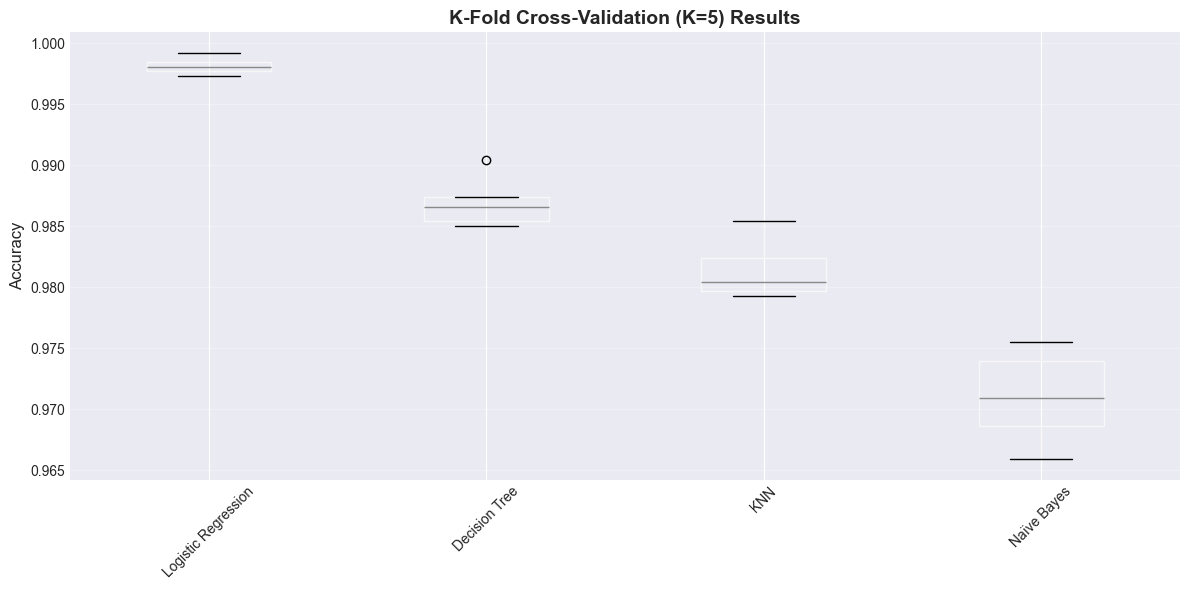

In [27]:
# K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Test with multiple models
models_cv = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naïve Bayes': GaussianNB()
}

cv_results_kfold = {}

for name, model in models_cv.items():
    scores = cross_val_score(model, X_clf_train_scaled, y_clf_train, cv=kfold, scoring='accuracy')
    cv_results_kfold[name] = scores
    print(f"{name} - K-Fold CV (K=5):")
    print(f"  Mean Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")
    print(f"  Individual scores: {scores}")

# Visualization
plt.figure(figsize=(12, 6))
cv_df = pd.DataFrame(cv_results_kfold)
cv_df.boxplot()
plt.ylabel('Accuracy', fontsize=12)
plt.title('K-Fold Cross-Validation (K=5) Results', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


Logistic Regression - Leave-One-Out CV:
  Mean Accuracy: 0.9550 (+/- 0.4146)
KNN - Leave-One-Out CV:
  Mean Accuracy: 0.9200 (+/- 0.5426)


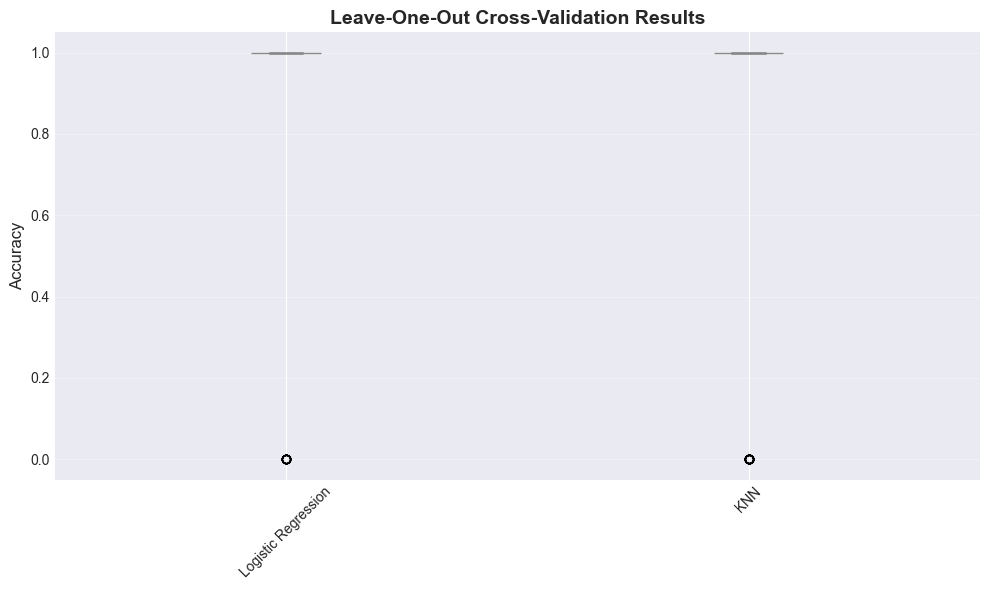

In [28]:
# Leave-One-Out Cross-Validation (using smaller sample due to computational cost)
loo_sample_size = min(200, len(X_clf_train_scaled))
indices_loo = np.random.choice(len(X_clf_train_scaled), loo_sample_size, replace=False)
X_loo = X_clf_train_scaled[indices_loo]
y_loo = y_clf_train.iloc[indices_loo]

loo = LeaveOneOut()

# Test with simpler models for LOO (it's computationally expensive)
models_loo = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

cv_results_loo = {}

for name, model in models_loo.items():
    scores = cross_val_score(model, X_loo, y_loo, cv=loo, scoring='accuracy')
    cv_results_loo[name] = scores
    print(f"{name} - Leave-One-Out CV:")
    print(f"  Mean Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

# Visualization
plt.figure(figsize=(10, 6))
loo_df = pd.DataFrame(cv_results_loo)
loo_df.boxplot()
plt.ylabel('Accuracy', fontsize=12)
plt.title('Leave-One-Out Cross-Validation Results', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


## 6.3 Ensemble Methods


Bagging Classifier Results:
Accuracy: 0.9878
ROC-AUC: 0.9989

AdaBoost Classifier Results:
Accuracy: 0.9936
ROC-AUC: 0.9997

Random Forest Classifier Results:
Accuracy: 0.9920
ROC-AUC: 0.9996

Ensemble Methods Comparison:
        Model  Accuracy  ROC-AUC
      Bagging  0.987753 0.998891
     AdaBoost  0.993570 0.999748
Random Forest  0.992039 0.999639


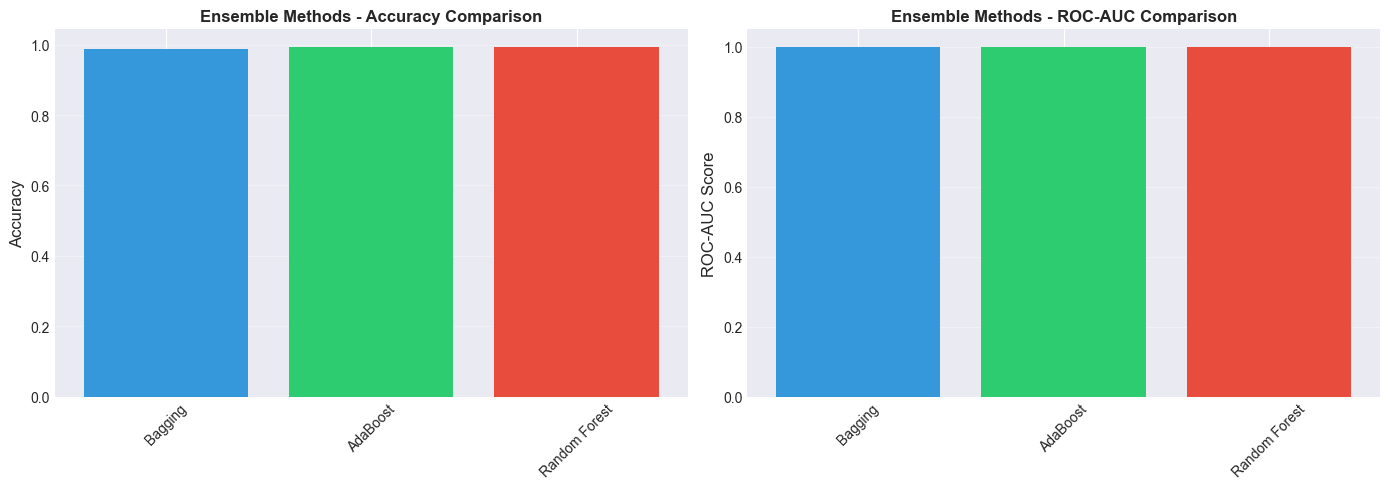

In [29]:
# Bagging
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=5),
    n_estimators=50,
    random_state=42
)
bagging_clf.fit(X_clf_train_scaled, y_clf_train)

y_bagging_pred = bagging_clf.predict(X_clf_test_scaled)
y_bagging_pred_proba = bagging_clf.predict_proba(X_clf_test_scaled)[:, 1]

accuracy_bagging = accuracy_score(y_clf_test, y_bagging_pred)
roc_auc_bagging = roc_auc_score(y_clf_test, y_bagging_pred_proba)

print("Bagging Classifier Results:")
print(f"Accuracy: {accuracy_bagging:.4f}")
print(f"ROC-AUC: {roc_auc_bagging:.4f}")

# Boosting - AdaBoost
adaboost_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=3),
    n_estimators=50,
    random_state=42
)
adaboost_clf.fit(X_clf_train_scaled, y_clf_train)

y_adaboost_pred = adaboost_clf.predict(X_clf_test_scaled)
y_adaboost_pred_proba = adaboost_clf.predict_proba(X_clf_test_scaled)[:, 1]

accuracy_adaboost = accuracy_score(y_clf_test, y_adaboost_pred)
roc_auc_adaboost = roc_auc_score(y_clf_test, y_adaboost_pred_proba)

print("\n" + "="*50)
print("AdaBoost Classifier Results:")
print(f"Accuracy: {accuracy_adaboost:.4f}")
print(f"ROC-AUC: {roc_auc_adaboost:.4f}")

# Random Forest (already used earlier, but let's compare)
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_clf.fit(X_clf_train_scaled, y_clf_train)

y_rf_pred = rf_clf.predict(X_clf_test_scaled)
y_rf_pred_proba = rf_clf.predict_proba(X_clf_test_scaled)[:, 1]

accuracy_rf = accuracy_score(y_clf_test, y_rf_pred)
roc_auc_rf = roc_auc_score(y_clf_test, y_rf_pred_proba)

print("\n" + "="*50)
print("Random Forest Classifier Results:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"ROC-AUC: {roc_auc_rf:.4f}")

# Comparison
ensemble_comparison = pd.DataFrame({
    'Model': ['Bagging', 'AdaBoost', 'Random Forest'],
    'Accuracy': [accuracy_bagging, accuracy_adaboost, accuracy_rf],
    'ROC-AUC': [roc_auc_bagging, roc_auc_adaboost, roc_auc_rf]
})

print("\n" + "="*50)
print("Ensemble Methods Comparison:")
print(ensemble_comparison.to_string(index=False))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(ensemble_comparison['Model'], ensemble_comparison['Accuracy'], 
           color=['#3498db', '#2ecc71', '#e74c3c'])
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Ensemble Methods - Accuracy Comparison', fontsize=12, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')

axes[1].bar(ensemble_comparison['Model'], ensemble_comparison['ROC-AUC'], 
           color=['#3498db', '#2ecc71', '#e74c3c'])
axes[1].set_ylabel('ROC-AUC Score', fontsize=12)
axes[1].set_title('Ensemble Methods - ROC-AUC Comparison', fontsize=12, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


In [30]:
# Create comprehensive summary
print("="*80)
print("COMPREHENSIVE MODEL PERFORMANCE SUMMARY")
print("="*80)

print("\n1. REGRESSION MODELS:")
print("-" * 80)
print(regression_comparison.to_string(index=False))

print("\n\n2. CLASSIFICATION MODELS:")
print("-" * 80)
print(classification_comparison.to_string(index=False))

print("\n\n3. ENSEMBLE METHODS:")
print("-" * 80)
print(ensemble_comparison.to_string(index=False))

print("\n\n4. NEURAL NETWORKS:")
print("-" * 80)
print(f"MLP Classifier - Accuracy: {accuracy_mlp_clf:.4f}, ROC-AUC: {roc_auc_mlp_clf:.4f}")
print(f"MLP Regressor - RMSE: {rmse_mlp_reg:.4f}, R²: {r2_mlp_reg:.4f}")

print("\n" + "="*80)
print("PROJECT COMPLETED SUCCESSFULLY!")
print("="*80)


COMPREHENSIVE MODEL PERFORMANCE SUMMARY

1. REGRESSION MODELS:
--------------------------------------------------------------------------------
        Model      MAE      MSE     RMSE  R² Score
    Simple LR 0.210316 0.338531 0.581834  0.920766
  Multiple LR 0.002907 0.000027 0.005210  0.999994
Polynomial LR 0.615727 4.275152 2.067644 -0.000611
  Logistic LR 0.003368 0.003368 0.058035  0.969447


2. CLASSIFICATION MODELS:
--------------------------------------------------------------------------------
        Model  Accuracy  Precision   Recall  F1 Score  ROC-AUC  Log Loss
          KNN  0.981323   0.980822 0.868932  0.921493 0.986359  0.142268
  Naïve Bayes  0.967851   0.808853 0.975728  0.884488 0.994837  0.253171
Decision Tree  0.986528   0.969388 0.922330  0.945274 0.981387  0.095615
          SVM  0.988977   0.992147 0.919903  0.954660 0.999510  0.019623


3. ENSEMBLE METHODS:
--------------------------------------------------------------------------------
        Model  Accuracy

---

# Conclusion

This project successfully demonstrates all six units of Predictive Analytics:

1. **Unit I**: Data preparation, cleaning, feature engineering, and preprocessing
2. **Unit II**: Regression models (Simple, Multiple, Polynomial, Logistic) with comprehensive evaluation metrics
3. **Unit III**: Classification algorithms (KNN, Naïve Bayes, Decision Trees, SVM) with all performance metrics
4. **Unit IV**: Unsupervised learning (K-Means, Hierarchical Clustering) and Association Rules
5. **Unit V**: Dimensionality reduction (PCA) and Neural Networks (MLP)
6. **Unit VI**: Model performance evaluation (Bias-Variance trade-off, Cross-validation, Ensemble methods)

All models have been evaluated using appropriate metrics and visualized for better understanding.
